# Microsoft Malware detection

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2>2.4. Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

<h1>3. Exploratory Data Analysis</h1>

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
from tqdm import tqdm
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize 
from nltk.util import ngrams
import h5py
import copy

In [2]:
# setting path
par_path = os.path.normpath(os.getcwd() + os.sep + os.pardir)
dir_path = os.path.join(par_path, 'microsoft-malware-detection', 'data')
dir_path

'/home/shekhar_bavanari/notebooks/microsoft-malware-detection/data'

In [9]:
#separating byte files and asm files 

source = os.path.join(dir_path, 'train')
destination = os.path.join(dir_path, 'byteFiles')

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination):
    os.makedirs(destination)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    os.rename(source, os.path.join(dir_path,'asmFiles'))
    source=os.path.join(dir_path, 'asmFiles')
    print("source", os.path.isdir(source))
    data_files = os.listdir(source)
    for file in data_files:
        if (file.endswith("bytes")):
            shutil.move(os.path.join(source,file), destination)

source True


<h2>3.1. Distribution of malware classes in whole data set </h2>

<IPython.core.display.Javascript object>


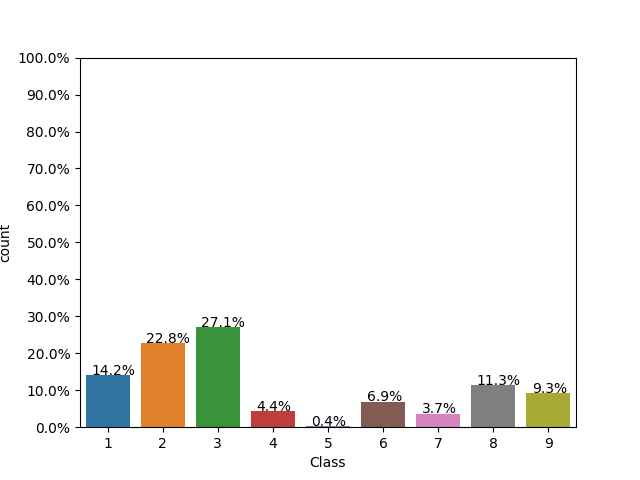

In [8]:
Y=pd.read_csv(os.path.join(dir_path,"trainLabels.csv"))
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

In [3]:
Y=pd.read_csv(os.path.join(dir_path,"trainLabels.csv"))
Y.head()

,Id,Class
0,01kcPWA9K2BOxQeS5Rju,1
1,04EjIdbPV5e1XroFOpiN,1
2,05EeG39MTRrI6VY21DPd,1
3,05rJTUWYAKNegBk2wE8X,1
4,0AnoOZDNbPXIr2MRBSCJ,1


In [13]:
print(total)
np.linspace(0, total, 11)

10868.0


array([    0. ,  1086.8,  2173.6,  3260.4,  4347.2,  5434. ,  6520.8,
        7607.6,  8694.4,  9781.2, 10868. ])

<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [4]:
#file sizes of byte files

files=os.listdir(os.path.join(dir_path, 'byteFiles'))
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat(os.path.join(dir_path,'byteFiles', file))
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print(data_size_byte.head())

                     ID      size  Class
0  gC2GsRX3ewpQyvjO0Hb4  0.539062      4
1  61SnhUm4jdWiFCZGsPJ7  6.703125      3
2  6E78GVaCMig3mTz1oFb0  6.714844      3
3  4mvuMIJG9n3iQgPSaZh7  1.593750      2
4  fNAE3eU6Q4Gh5PtnCyMZ  6.703125      3


<h3> 3.2.2 box plots of file size (.byte files) feature </h3>

<IPython.core.display.Javascript object>


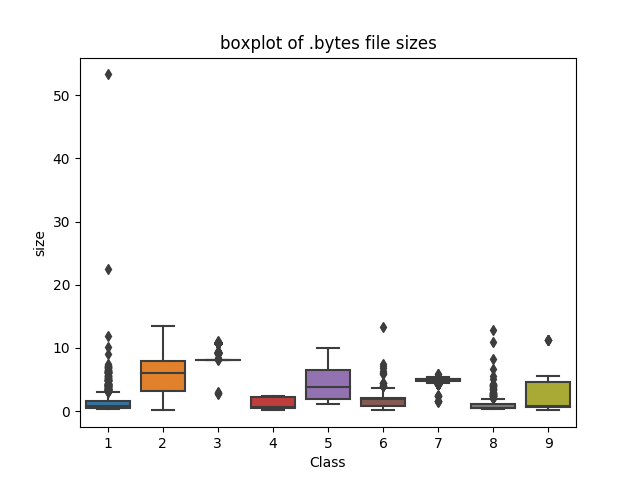

In [15]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

<h3>3.2.3 feature extraction from byte files </h3>

In [16]:
#removal of address from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

files = os.listdir(os.path.join(dir_path, 'byteFiles'))
filenames=[]
array=[]
for file in files:
    if (file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open(os.path.join(dir_path,'byteFiles', file+".txt"), 'w+')
        with open(os.path.join(dir_path,'byteFiles',file+".bytes"),"r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove(os.path.join(dir_path,'byteFiles', file+".bytes"))
        text_file.close()

In [6]:
files = os.listdir(os.path.join(dir_path, 'byteFiles'))
# because hashing is faster --> in searching keys
all_keys = []
# t0 = time.time()

def calc_bi_tri_grams(file):
    temp_list = []
    with open(os.path.join(dir_path, 'byteFiles', file),"r") as byte_flie:
        all_lines = []
        for lines in byte_flie:
            line=lines.rstrip().split(" ")
            all_lines.extend(line)
            # unigrams
        for hex_code in line:
#                 if hex_code.lower() not in temp_dict:
            temp_list.append(hex_code.lower())
        temp_list = list(set(temp_list))
        # bigrams
        bi_g = [' '.join(x) for x in list(ngrams(all_lines, 2))]
        for hex_code in bi_g:
#             if hex_code.lower() not in temp_dict:
                temp_list.append(hex_code.lower())
        temp_list = list(set(temp_list))
        # trigrams
        # dictionary getting HUGE!
#         tri_g = [' '.join(x) for x in list(ngrams(all_lines, 3))]
#         for hex_code in tri_g:
#             if hex_code.lower() not in temp_dict:
#                 temp_dict[hex_code.lower()] = 0
    return temp_list

for fi in tqdm(files):
    all_keys.extend(calc_bi_tri_grams(fi))
    all_keys = list(set(all_keys))

# with ThreadPoolExecutor(max_workers=20) as executor:
#     result_futures = [executor.submit(calc_bi_tri_grams, x) for x in files]
#     for f in futures.as_completed(result_futures):
#         all_keys.update(f.result())
# print("Seconds", time.time()-t0)
len(all_keys)

100%|██████████| 10868/10868 [4:08:45<00:00,  1.77s/it] 


66183

In [ ]:
# all_keys_list = list(all_keys)

with open(os.path.join(dir_path, 'uni_bigram_keys.pkl'), 'wb') as big:
    pickle.dump(all_keys, big)

In [3]:
###################################################
###################################################
with open(os.path.join(dir_path, 'uni_bigram_keys.pkl'), 'rb') as big:
    all_keys = pickle.load(big)

In [4]:
a="00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15\
,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29\
,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,\
3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,\
53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,\
69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,\
80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,\
97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,\
ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,\
c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,\
df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,\
f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"
a = a.replace(",", " ")
a_uni = a.split(" ")

In [5]:
all_keys.extend(a_uni)

In [6]:
len(all_keys)

66440

In [10]:
all_keys_dict = dict(zip(all_keys, [0]*len(all_keys)))

In [8]:
files = os.listdir(os.path.join(dir_path, 'byteFiles'))
filenames2=[]

if os.path.exists(os.path.join(dir_path, 'bytes_result_new.csv')):
    os.remove(os.path.join(dir_path, 'bytes_result_new.csv'))

#program to convert into bag of words of bytefiles

byte_feature_file=open(os.path.join(dir_path, 'bytes_result_new.csv'),'w+')
#########################
byte_feature_file.write("ID,"+','.join(all_keys))
byte_feature_file.write("\n")
#########################
for file in tqdm(files):
    filenames2.append(file)
    if(file.endswith("txt")):
        with open(os.path.join(dir_path, 'byteFiles', file),"r") as byte_flie:
            byte_feature_file.write(file.split(".")[0]+",")
            temp = all_keys_dict.copy()
            all_lines = []
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                all_lines.extend(line)
            # unigrams
            for hex_code in all_lines:
                temp[hex_code.lower()] += 1
            # bigrams
            bi_g = [' '.join(x) for x in list(ngrams(all_lines, 2))]
            for hex_code_bi in bi_g:
                temp[hex_code_bi.lower()] += 1
            # trigrams
#             tri_g = [' '.join(x) for x in list(ngrams(all_lines, 3))]
#             for hex_code in tri_g:
#                 temp_dict[hex_code.lower()] += 1
            features = [str(temp[x]) for x in all_keys]
            byte_feature_file.write(','.join(features))
            byte_feature_file.write("\n")
            del temp

byte_feature_file.close()

100%|██████████| 10868/10868 [5:42:08<00:00,  2.32s/it] 


In [14]:
byte_features=pd.read_csv(os.path.join(dir_path, 'bytes_result_new.csv'), index_col=0)
byte_features.head()

,ID,b4 f2,4f 1c,55 ff,f6 d2,3f 7c,91 dd,35 85,00 25,82 a4,...,f7,f8,f9.1,fa,fb,fc.1,fd.1,fe.1,ff.1,??.1
0,gC2GsRX3ewpQyvjO0Hb4,1,1,0,2,2,0,2,3,0,...,443,376,352,360,374,493,382,368,501,86560
1,61SnhUm4jdWiFCZGsPJ7,16,8,37,18,18,12,11,27,16,...,3149,3192,3177,3258,3135,3283,3319,3196,7105,1490076
2,6E78GVaCMig3mTz1oFb0,18,15,25,16,12,7,9,17,12,...,3208,3242,3133,3189,3226,3282,3141,3161,6725,1497244
3,4mvuMIJG9n3iQgPSaZh7,0,0,2,55,0,0,0,1,0,...,226,156,221,84,5437,171,134,1226,1597,4000
4,fNAE3eU6Q4Gh5PtnCyMZ,15,21,22,8,10,14,8,24,12,...,3191,3155,3130,3092,3147,3296,3215,3195,6713,1491612


In [11]:
byte_features.shape

(10868, 66441)

In [14]:
result = pd.merge(byte_features, data_size_byte, on='ID',how='left')
result.head()

,ID,b4 f2,4f 1c,55 ff,f6 d2,3f 7c,91 dd,35 85,00 25,82 a4,...,f9.1,fa,fb,fc.1,fd.1,fe.1,ff.1,??.1,size,Class
0,gC2GsRX3ewpQyvjO0Hb4,1,1,0,2,2,0,2,3,0,...,352,360,374,493,382,368,501,86560,0.539062,4
1,61SnhUm4jdWiFCZGsPJ7,16,8,37,18,18,12,11,27,16,...,3177,3258,3135,3283,3319,3196,7105,1490076,6.703125,3
2,6E78GVaCMig3mTz1oFb0,18,15,25,16,12,7,9,17,12,...,3133,3189,3226,3282,3141,3161,6725,1497244,6.714844,3
3,4mvuMIJG9n3iQgPSaZh7,0,0,2,55,0,0,0,1,0,...,221,84,5437,171,134,1226,1597,4000,1.593750,2
4,fNAE3eU6Q4Gh5PtnCyMZ,15,21,22,8,10,14,8,24,12,...,3130,3092,3147,3296,3215,3195,6713,1491612,6.703125,3


In [7]:
cols_to_norm = copy.deepcopy(all_keys)
cols_to_norm.append('size')

In [8]:
len(cols_to_norm)

66441

In [16]:
feat_arr = result[cols_to_norm].astype(float).values

In [20]:
print(feat_arr[0][1], feat_arr[0].min(), feat_arr[0].max())

1.0 0.0 86560.0


In [21]:
# normalizing array
feat_arr = (feat_arr - feat_arr.min(axis=0))/(feat_arr.max(axis=0)-feat_arr.min(axis=0))

In [22]:
print(feat_arr[0][0], feat_arr[0].min(), feat_arr[0].max())

0.002631578947368421 0.0 1.0


In [23]:
print(type(feat_arr), feat_arr.shape)

<class 'numpy.ndarray'> (10868, 66441)


In [21]:
with h5py.File(os.path.join(dir_path, 'final_byte_features.h5'), 'w') as hf:
    hf.create_dataset("feature_array",  data=feat_arr)
with open(os.path.join(dir_path, 'id_values.pkl'), 'wb') as f2:
    pickle.dump(result['ID'].values, f2)
with open(os.path.join(dir_path, 'class_values.pkl'), 'wb') as f3:
    pickle.dump(result['Class'].values, f3)

In [10]:
###############################################
###############################################
with h5py.File(os.path.join(dir_path, 'final_byte_features.h5'), 'r') as hf:
    feat_arr = hf["feature_array"][:]
with open(os.path.join(dir_path, 'id_values.pkl'), 'rb') as f2:
    class_id = list(pickle.load(f2))
with open(os.path.join(dir_path, 'class_values.pkl'), 'rb') as f3:
    data_y = list(pickle.load(f3))

In [11]:
feat_arr.shape

(10868, 66441)

In [12]:
result = pd.DataFrame(feat_arr, columns=cols_to_norm)
result['ID'] = class_id
result['Class'] = data_y
result.head()

,b4 f2,4f 1c,55 ff,f6 d2,3f 7c,91 dd,35 85,00 25,82 a4,9b 7f,...,fa,fb,fc,fd,fe,ff,??,size,ID,Class
0,0.002632,0.000039,0.000000,0.000429,0.000613,0.000000,0.000144,0.000077,0.000000,0.000000,...,0.001470,0.001646,0.005671,0.001793,0.001914,0.000683,0.006111,0.010226,gC2GsRX3ewpQyvjO0Hb4,4
1,0.042105,0.000311,0.003446,0.003861,0.005513,0.021898,0.000791,0.000689,0.024465,0.057851,...,0.013299,0.013801,0.037763,0.015582,0.016620,0.009687,0.105191,0.150254,61SnhUm4jdWiFCZGsPJ7,3
2,0.047368,0.000584,0.002328,0.003432,0.003675,0.012774,0.000648,0.000434,0.018349,0.061983,...,0.013018,0.014202,0.037751,0.014746,0.016438,0.009169,0.105697,0.150520,6E78GVaCMig3mTz1oFb0,3
3,0.000000,0.000000,0.000186,0.011798,0.000000,0.000000,0.000000,0.000026,0.000000,0.000000,...,0.000343,0.023935,0.001967,0.000629,0.006376,0.002177,0.000282,0.034185,4mvuMIJG9n3iQgPSaZh7,2
4,0.039474,0.000817,0.002049,0.001716,0.003063,0.025547,0.000576,0.000613,0.018349,0.066116,...,0.012622,0.013854,0.037912,0.015094,0.016615,0.009152,0.105300,0.150254,fNAE3eU6Q4Gh5PtnCyMZ,3


<h3>3.2.4 Multivariate Analysis </h3>

In [4]:
from MulticoreTSNE import MulticoreTSNE as TSNE

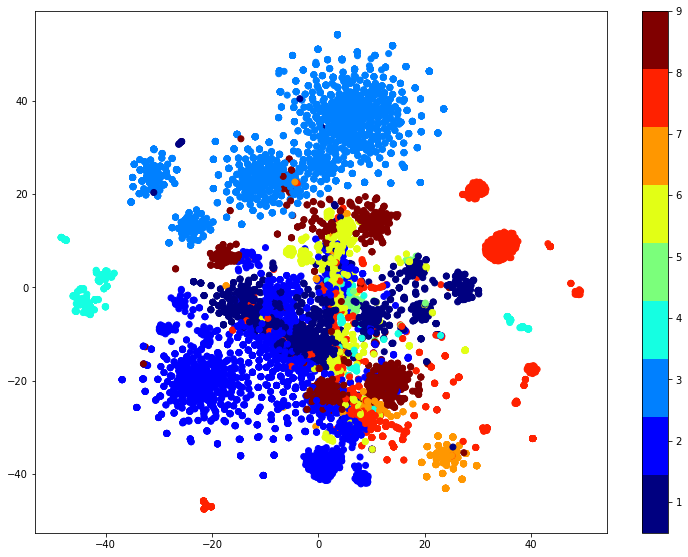

In [5]:
#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50, n_jobs=7)
results=xtsne.fit_transform(feat_arr)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.figure(figsize=(12.8, 9.6))
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

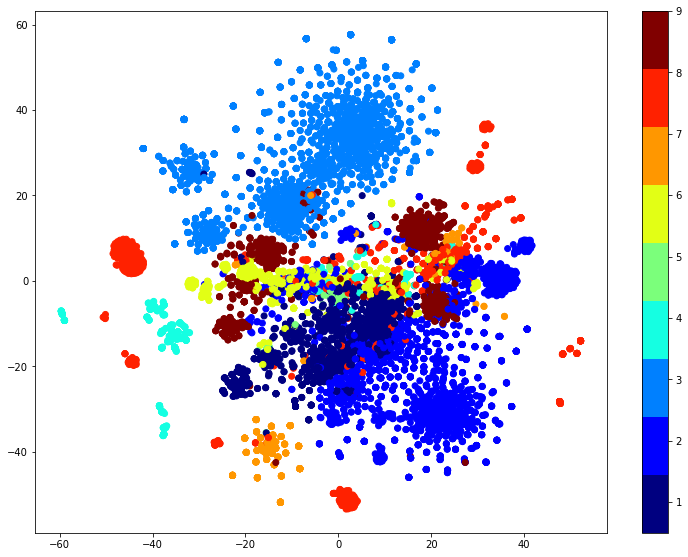

In [6]:
#this is with perplexity 30
xtsne=TSNE(perplexity=30, n_jobs=7)
results=xtsne.fit_transform(feat_arr)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.figure(figsize=(12.8, 9.6))
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

In [3]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

In [5]:
# data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(feat_arr, data_y, stratify=data_y, test_size=0.20)
# split the train data into train and cross validation by maintaining same 
# distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.20)

100%|██████████| 9/9 [6:02:09<00:00, 3516.50s/it]  


log_loss for c =  1e-05 is 1.4736851217606557
log_loss for c =  0.0001 is 1.1493601371567068
log_loss for c =  0.001 is 0.8408176010211054
log_loss for c =  0.01 is 0.4304170440801864
log_loss for c =  0.1 is 0.2620218460997941
log_loss for c =  1 is 0.17053329890094887
log_loss for c =  10 is 0.15609657273987332
log_loss for c =  100 is 0.15243121439990043
log_loss for c =  1000 is 0.14438656921452764


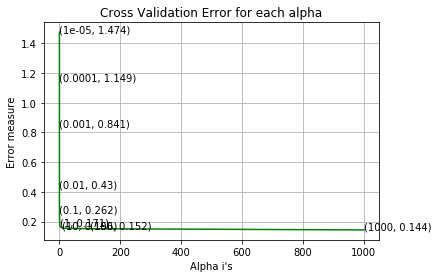

log loss for train data 0.04702957693752768
log loss for cv data 0.14438656921452764
log loss for test data 0.1806386057721044
Number of misclassified points  3.3578656853725852
-------------------------------------------------- Confusion matrix --------------------------------------------------


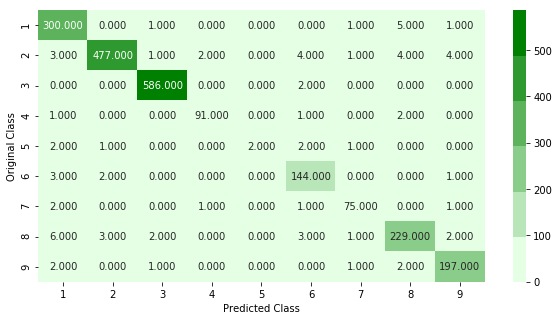

-------------------------------------------------- Precision matrix --------------------------------------------------


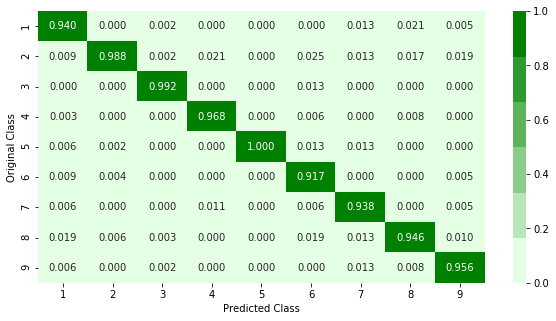

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


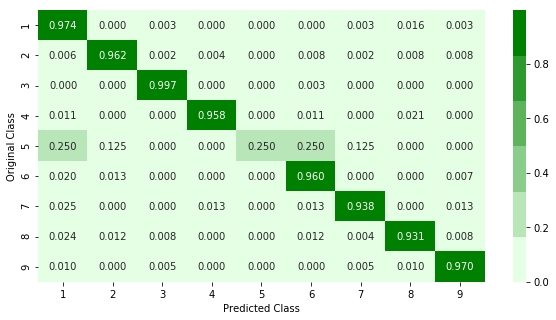

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in tqdm(alpha):
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced', n_jobs=-2)
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2', C=alpha[best_alpha], class_weight='balanced', n_jobs=-2)
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

100%|██████████| 7/7 [43:54<00:00, 598.71s/it]

log_loss for c =  10 is 0.07807215533815923
log_loss for c =  50 is 0.06025495510972129
log_loss for c =  100 is 0.05957531349335243
log_loss for c =  500 is 0.05854070257716586
log_loss for c =  1000 is 0.05782896862259964
log_loss for c =  2000 is 0.05843389948812721
log_loss for c =  3000 is 0.05875642301947378


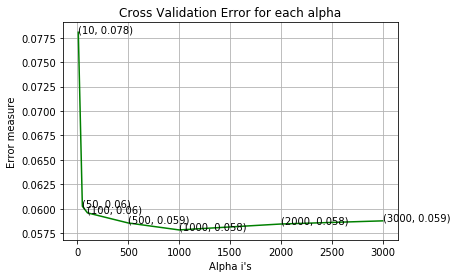

For values of best alpha =  1000 The train log loss is: 0.01980659829290752
For values of best alpha =  1000 The cross validation log loss is: 0.05782896862259964
For values of best alpha =  1000 The test log loss is: 0.07739464647843151
Number of misclassified points  1.609935602575897
-------------------------------------------------- Confusion matrix --------------------------------------------------


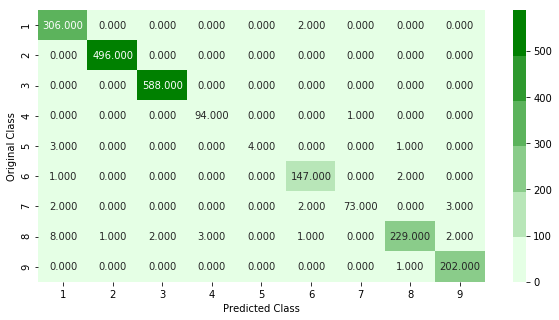

-------------------------------------------------- Precision matrix --------------------------------------------------


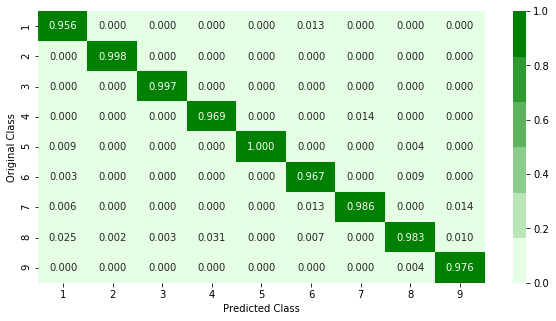

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


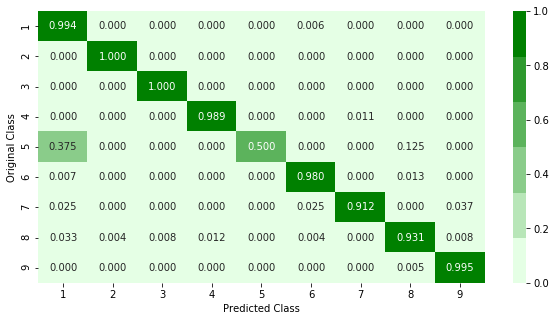

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in tqdm(alpha):
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-2)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-2)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

100%|██████████| 6/6 [29:13:47<00:00, 24624.90s/it]  


log_loss for c =  10 is 0.10721726361126983
log_loss for c =  50 is 0.06127787162428715
log_loss for c =  100 is 0.059864914619349376
log_loss for c =  500 is 0.06131142485043406
log_loss for c =  1000 is 0.06130553394958071
log_loss for c =  2000 is 0.061305422302570224


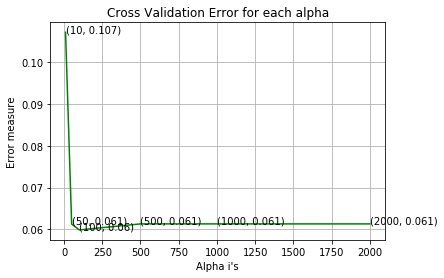

For values of best alpha =  100 The train log loss is: 0.014577578708643787
For values of best alpha =  100 The cross validation log loss is: 0.059864914619349376
For values of best alpha =  100 The test log loss is: 0.04891256790410372
Number of misclassified points  0.9199632014719411
-------------------------------------------------- Confusion matrix --------------------------------------------------


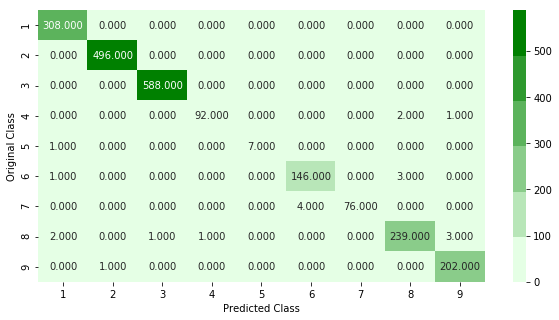

-------------------------------------------------- Precision matrix --------------------------------------------------


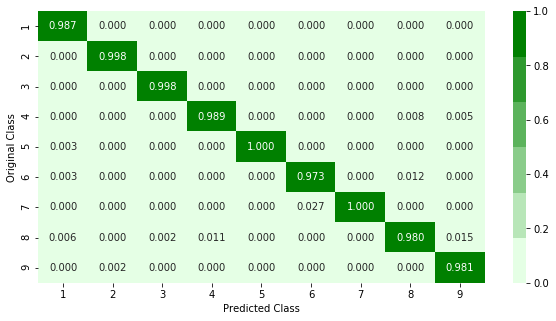

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


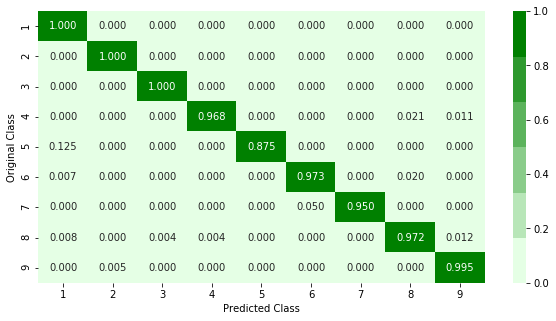

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in tqdm(alpha):
    x_cfl=XGBClassifier(n_estimators=i,n_jobs=7)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],n_jobs=7)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h2> 4.2 Modeling with .asm files </h2>

<pre>
There are 10868 files of asm 
All the files make up about 150 GB
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs
With the help of parallel processing we extracted all the features.In parallel we can use all the cores that are present in our computer.


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. <br> Refer:https://www.kaggle.com/c/malware-classification/discussion
</pre>

<h3> 4.2.1 Feature extraction from asm files </h3>

<p>
<li> To extract the unigram features from the .asm files we need to process ~150GB of data </li>
<li style="font-size:18px"><b>Note: Below two cells will take lot of time (over 48 hours to complete)</b></li>
<li> We will provide you the output file of these two cells, which you can directly use it </li>
</p>

In [3]:
df=pd.read_csv(os.path.join(dir_path,"trainLabels.csv"))
df.head()

,Id,Class
0,01kcPWA9K2BOxQeS5Rju,1
1,04EjIdbPV5e1XroFOpiN,1
2,05EeG39MTRrI6VY21DPd,1
3,05rJTUWYAKNegBk2wE8X,1
4,0AnoOZDNbPXIr2MRBSCJ,1


In [5]:
source = os.path.join(dir_path, 'asmFiles/')
files = os.listdir(source)
source

'/home/shekhar_bavanari/notebooks/microsoft-malware-detection/data/asmFiles/'

In [7]:
folder_1 = os.path.join(dir_path, 'first/')
folder_1

'/home/shekhar_bavanari/notebooks/microsoft-malware-detection/data/first/'

In [9]:
#intially create five folders
#first 
#second
#thrid
#fourth
#fifth
#this code tells us about random split of files into five folders
folder_1 = os.path.join(dir_path, 'first/')
folder_2 = os.path.join(dir_path, 'second/')
folder_3 = os.path.join(dir_path, 'third/')
folder_4 = os.path.join(dir_path, 'fourth/')
folder_5 = os.path.join(dir_path, 'fifth/')
folder_6 = os.path.join(dir_path, 'output/')
for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source = os.path.join(dir_path, 'asmFiles/')
files = os.listdir(source)
ID=df['Id'].tolist()
data=list(range(0,10868))
r.shuffle(data)
count=0
for i in tqdm(range(0,10868)):
    if i % 5==0:
        shutil.move(source+files[data[i]], folder_1)
    elif i%5==1:
        shutil.move(source+files[data[i]], folder_2)
    elif i%5 ==2:
        shutil.move(source+files[data[i]], folder_3)
    elif i%5 ==3:
        shutil.move(source+files[data[i]], folder_4)
    elif i%5==4:
        shutil.move(source+files[data[i]], folder_5)

100%|██████████| 10868/10868 [00:00<00:00, 11103.67it/s]


In [ ]:

#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def firstprocess():
    #The prefixes tells about the segments that are present in the asm files
    #There are 450 segments(approx) present in all asm files.
    #this prefixes are best segments that gives us best values.
    #https://en.wikipedia.org/wiki/Data_segment
    
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    #this are opcodes that are used to get best results
    #https://en.wikipedia.org/wiki/X86_instruction_listings
    
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    #best keywords that are taken from different blogs
    keywords = ['.dll','std::',':dword']
    #Below taken registers are general purpose registers and special registers
    #All the registers which are taken are best 
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open(os.path.join(dir_path, "output", "asmsmallfile.txt"),"w+")
    files = os.listdir(folder_1)
    for f in files:
        #filling the values with zeros into the arrays
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        # https://docs.python.org/3/library/codecs.html#codecs.ignore_errors
        # https://docs.python.org/3/library/codecs.html#codecs.Codec.encode
        with codecs.open(folder_1+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                # https://www.tutorialspoint.com/python3/string_rstrip.htm
                line=lines.rstrip().split()
                l=line[0]
                #counting the prefixs in each and every line
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                #counting the opcodes in each and every line
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                #counting registers in the line
                for i in range(len(registers)):
                    for li in line:
                        # we will use registers only in 'text' and 'CODE' segments
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                #counting keywords in the line
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        #pushing the values into the file after reading whole file
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


#same as above 
def secondprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open(os.path.join(dir_path, "output", "mediumasmfile.txt"),"w+")
    files = os.listdir(folder_2)
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open(folder_2+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()

# same as smallprocess() functions
def thirdprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open(os.path.join(dir_path, "output", "largeasmfile.txt"),"w+")
    files = os.listdir(folder_3)
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open(folder_3+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fourthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open(os.path.join(dir_path, "output", "hugeasmfile.txt"),"w+")
    files = os.listdir(folder_4)
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open(folder_4+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fifthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open(os.path.join(dir_path, "output", "trainasmfile.txt"),"w+")
    files = os.listdir(folder_5)
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open(folder_5+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager=multiprocessing.Manager() 	
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)
    p3=Process(target=thirdprocess)
    p4=Process(target=fourthprocess)
    p5=Process(target=fifthprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

if __name__=="__main__":
    main()

In [13]:
# asmoutputfile.csv(output genarated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this
dfasm=pd.read_csv(os.path.join(dir_path, "asmoutputfile.csv"))
Y=pd.read_csv(os.path.join(dir_path,"trainLabels.csv"))
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip,Class
0,01kcPWA9K2BOxQeS5Rju,19,744,0,127,57,0,323,0,3,...,18,66,15,43,83,0,17,48,29,1
1,1E93CpP60RHFNiT5Qfvn,17,838,0,103,49,0,0,0,3,...,18,29,48,82,12,0,14,0,20,1
2,3ekVow2ajZHbTnBcsDfX,17,427,0,50,43,0,145,0,3,...,13,42,10,67,14,0,11,0,9,1
3,3X2nY7iQaPBIWDrAZqJe,17,227,0,43,19,0,0,0,3,...,6,8,14,7,2,0,8,0,6,1
4,46OZzdsSKDCFV8h7XWxf,17,402,0,59,170,0,0,0,3,...,12,9,18,29,5,0,11,0,11,1


<h4> 4.2.1.1 Files sizes of each .asm file </h4>

In [14]:
#file sizes of byte files

files=os.listdir(os.path.join(dir_path, 'asmFiles'))
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat(os.path.join(dir_path, 'asmFiles', file))
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
asm_size_byte.head()

,ID,size,Class
0,HJPDtkT9Qv63BiG810AM,1.102405,8
1,CQVMwzgEYXvN4tOoKSis,0.121575,3
2,70Svz3Aitx6KsDEuOXZG,33.790153,2
3,Ipt2fgymMd7K8BO1YF4P,0.169940,3
4,IWcps27Z3F1niBVavCw8,0.260738,3


<h4> 4.2.1.2 Distribution of .asm file sizes</h4>

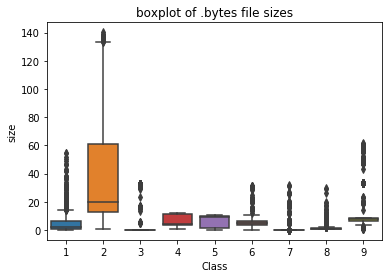

In [17]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [15]:
# add the file size feature to previous extracted features
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte.drop(['Class'], axis=1),on='ID', how='left')
result_asm.head()

(10868, 53)
(10868, 3)


,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,esi,eax,ebx,ecx,edi,ebp,esp,eip,Class,size
0,01kcPWA9K2BOxQeS5Rju,19,744,0,127,57,0,323,0,3,...,66,15,43,83,0,17,48,29,1,0.078190
1,1E93CpP60RHFNiT5Qfvn,17,838,0,103,49,0,0,0,3,...,29,48,82,12,0,14,0,20,1,0.063400
2,3ekVow2ajZHbTnBcsDfX,17,427,0,50,43,0,145,0,3,...,42,10,67,14,0,11,0,9,1,0.041695
3,3X2nY7iQaPBIWDrAZqJe,17,227,0,43,19,0,0,0,3,...,8,14,7,2,0,8,0,6,1,0.018757
4,46OZzdsSKDCFV8h7XWxf,17,402,0,59,170,0,0,0,3,...,9,18,29,5,0,11,0,11,1,0.037567


In [16]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
# result = normalize(result)

In [17]:
# we normalize the data each column 
result_asm = normalize(result_asm)
result_asm.head()

,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,esi,eax,ebx,ecx,edi,ebp,esp,eip,Class,size
0,01kcPWA9K2BOxQeS5Rju,0.107345,0.001092,0.0,0.000761,0.000023,0.0,0.000084,0.0,0.000072,...,0.000746,0.000301,0.000360,0.001057,0.0,0.030797,0.001468,0.003173,1,0.000432
1,1E93CpP60RHFNiT5Qfvn,0.096045,0.001230,0.0,0.000617,0.000019,0.0,0.000000,0.0,0.000072,...,0.000328,0.000965,0.000686,0.000153,0.0,0.025362,0.000000,0.002188,1,0.000327
2,3ekVow2ajZHbTnBcsDfX,0.096045,0.000627,0.0,0.000300,0.000017,0.0,0.000038,0.0,0.000072,...,0.000475,0.000201,0.000560,0.000178,0.0,0.019928,0.000000,0.000985,1,0.000172
3,3X2nY7iQaPBIWDrAZqJe,0.096045,0.000333,0.0,0.000258,0.000008,0.0,0.000000,0.0,0.000072,...,0.000090,0.000281,0.000059,0.000025,0.0,0.014493,0.000000,0.000657,1,0.000009
4,46OZzdsSKDCFV8h7XWxf,0.096045,0.000590,0.0,0.000353,0.000068,0.0,0.000000,0.0,0.000072,...,0.000102,0.000362,0.000243,0.000064,0.0,0.019928,0.000000,0.001204,1,0.000143


<h3> 4.2.2 Univariate analysis on  asm file features</h3>

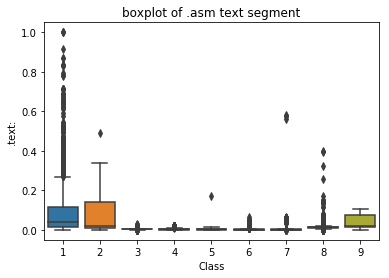

In [23]:
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()

<pre>
The plot is between Text and class 
Class 1,2 and 9 can be easly separated
</pre>

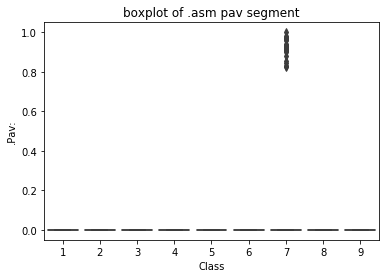

In [24]:
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()

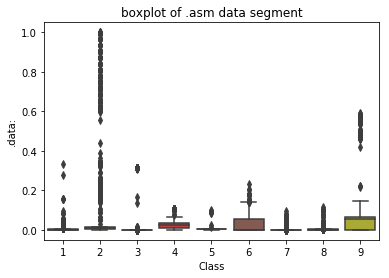

In [25]:
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()

<pre>
The plot is between data segment and class label 
class 6 and class 9 can be easily separated from given points
</pre>

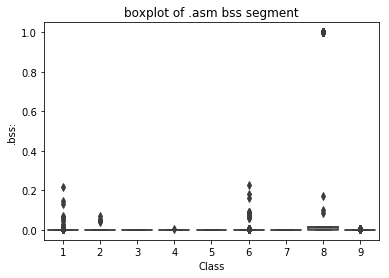

In [26]:
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()

<pre>
plot between bss segment and class label
very less number of files are having bss segment
</pre>

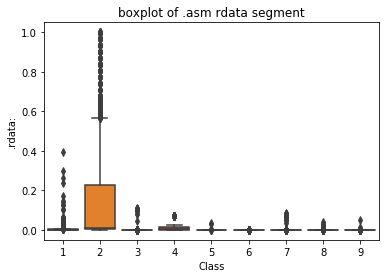

In [27]:
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()

<pre>
Plot between rdata segment and Class segment
Class 2 can be easily separated 75 pecentile files are having 1M rdata lines
</pre>

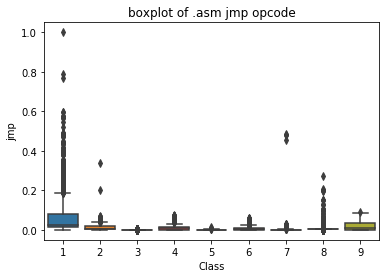

In [28]:
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()

<pre>
plot between jmp and Class label
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

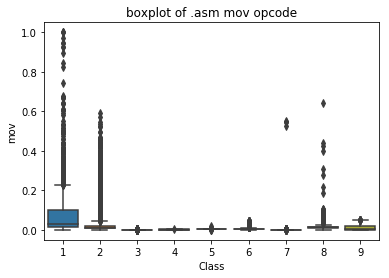

In [29]:
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()

<pre>
plot between Class label and mov opcode
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

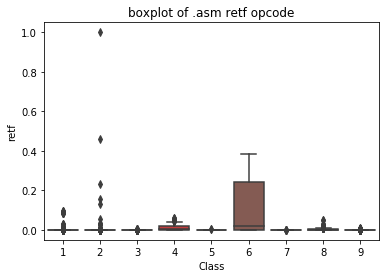

In [30]:
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()

<pre>
plot between Class label and retf
Class 6 can be easily separated with opcode retf
The frequency of retf is approx of 250.
</pre>

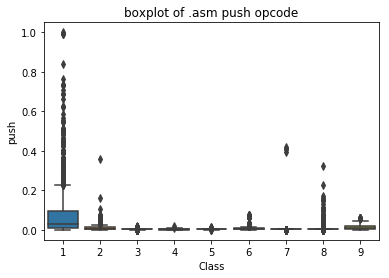

In [31]:
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()

<pre>
plot between push opcode and Class label
Class 1 is having 75 precentile files with push opcodes of frequency 1000
</pre>

<h3> 4.2.2 Multivariate Analysis on .asm file features </h3>

In [33]:
data_y = result_asm['Class']

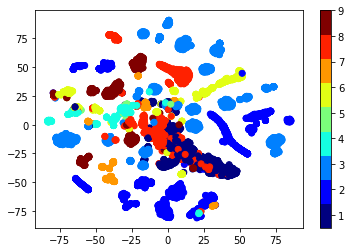

In [34]:
# check out the course content for more explantion on tsne algorithm

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_asm.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

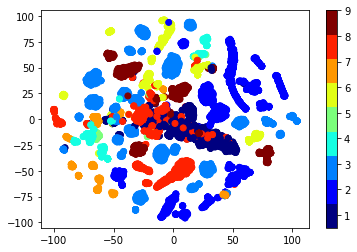

In [35]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_asm.drop(['ID','Class', 'rtn', '.BSS:', '.CODE','size'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<pre>
TSNE for asm data with perplexity 50
</pre>

<h3> 4.2.3 Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>
<li>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less </li>
<li>2. Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

<h2> 4.3 Train and test split</h2>

In [21]:
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

In [22]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [23]:
print( X_cv_asm.isnull().all())

HEADER:    False
.text:     False
.Pav:      False
.idata:    False
.data:     False
.bss:      False
.rdata:    False
.edata:    False
.rsrc:     False
.tls:      False
.reloc:    False
jmp        False
mov        False
retf       False
push       False
pop        False
xor        False
retn       False
nop        False
sub        False
inc        False
dec        False
add        False
imul       False
xchg       False
or         False
shr        False
cmp        False
call       False
shl        False
ror        False
rol        False
jnb        False
jz         False
lea        False
movzx      False
.dll       False
std::      False
:dword     False
edx        False
esi        False
eax        False
ebx        False
ecx        False
edi        False
ebp        False
esp        False
eip        False
dtype: bool


<h2> 4.4. Machine Learning models on features of .asm files</h2>

<h3> 4.4.1 K-Nearest Neigbors </h3>

log_loss for k =  1 is 0.104531321344
log_loss for k =  3 is 0.0958800580948
log_loss for k =  5 is 0.0995466557335
log_loss for k =  7 is 0.107227274345
log_loss for k =  9 is 0.119239543547
log_loss for k =  11 is 0.133926642781
log_loss for k =  13 is 0.147643793967
log_loss for k =  15 is 0.159439699615
log_loss for k =  17 is 0.16878376444
log_loss for k =  19 is 0.178020728839


<IPython.core.display.Javascript object>


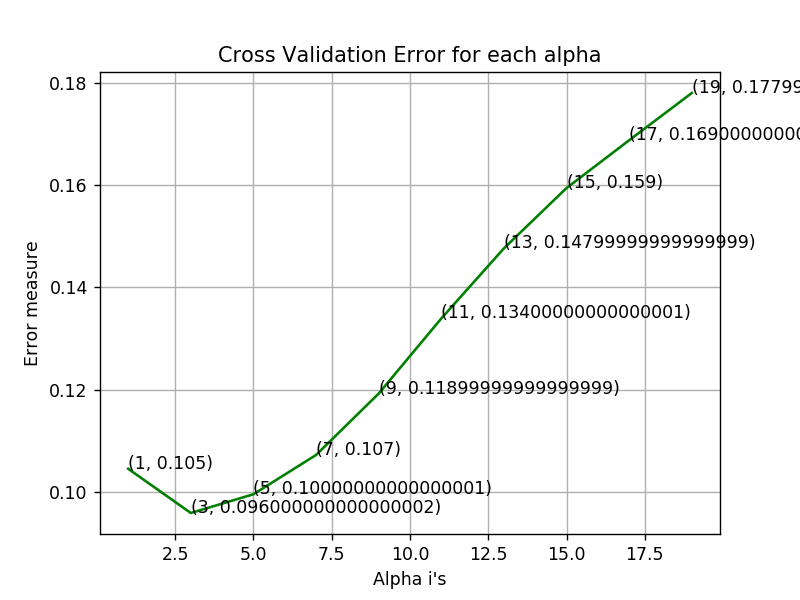

log loss for train data 0.0476773462198
log loss for cv data 0.0958800580948
log loss for test data 0.0894810720832
Number of misclassified points  2.02391904324
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


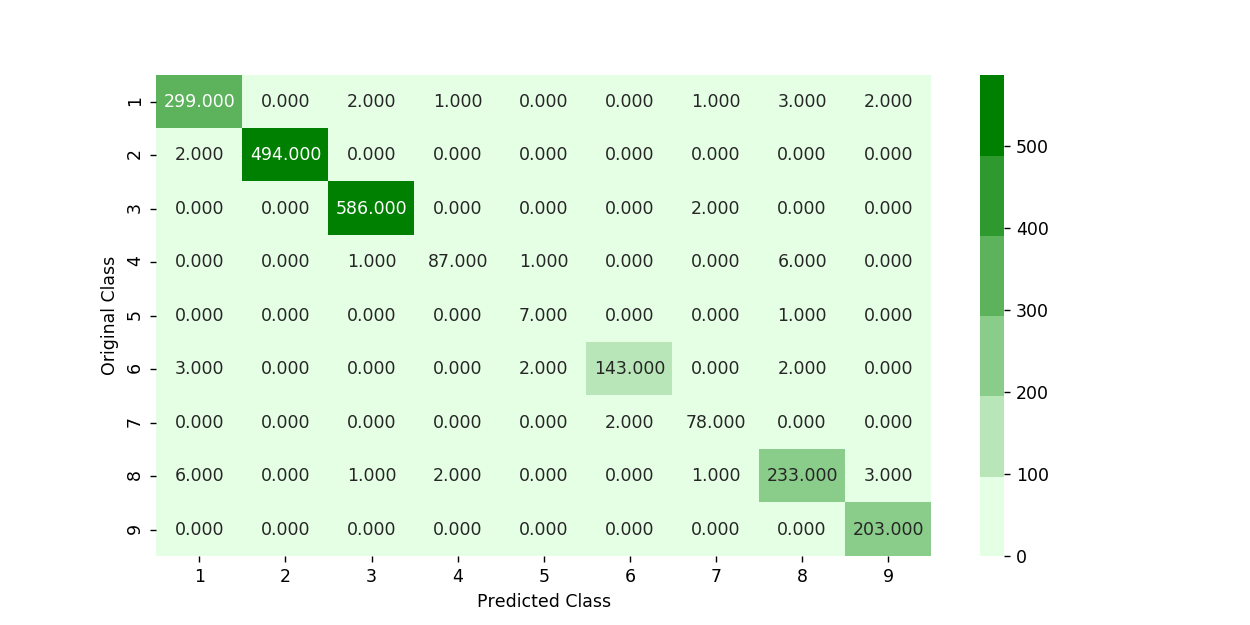

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


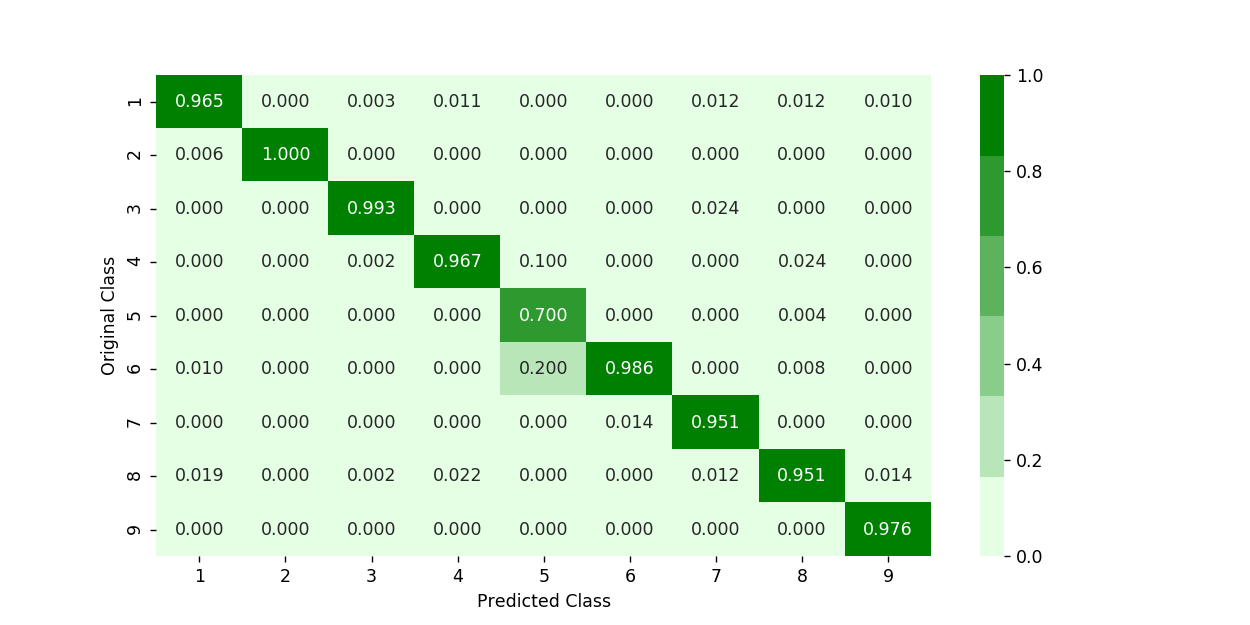

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


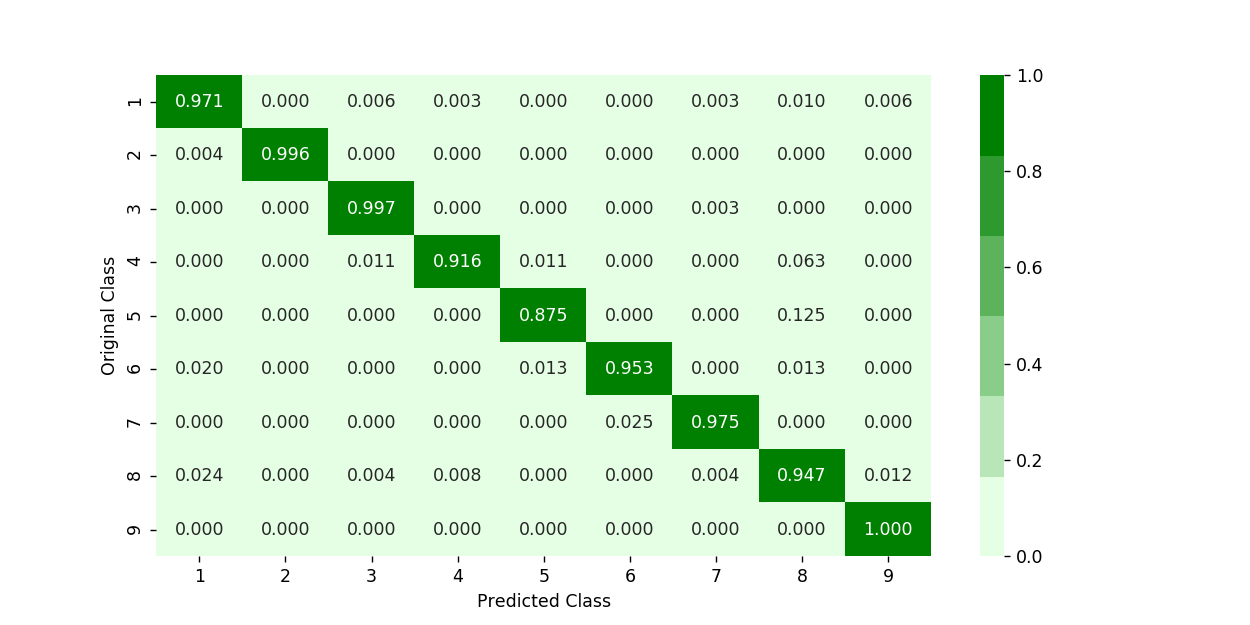

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at 
# http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.2 Logistic Regression </h3>

log_loss for c =  1e-05 is 1.58867274165
log_loss for c =  0.0001 is 1.54560797884
log_loss for c =  0.001 is 1.30137786807
log_loss for c =  0.01 is 1.33317456931
log_loss for c =  0.1 is 1.16705751378
log_loss for c =  1 is 0.757667807779
log_loss for c =  10 is 0.546533939819
log_loss for c =  100 is 0.438414998062
log_loss for c =  1000 is 0.424423536526


<IPython.core.display.Javascript object>


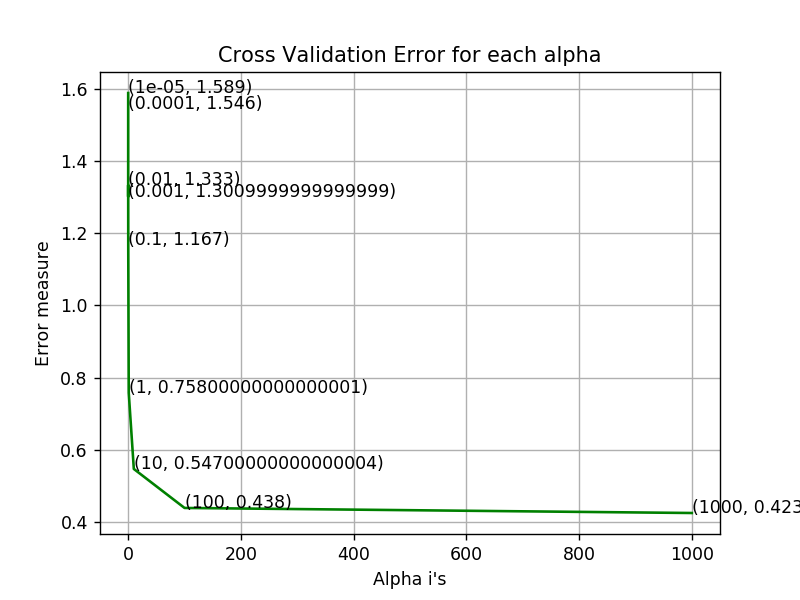

log loss for train data 0.396219394701
log loss for cv data 0.424423536526
log loss for test data 0.415685592517
Number of misclassified points  9.61361545538
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


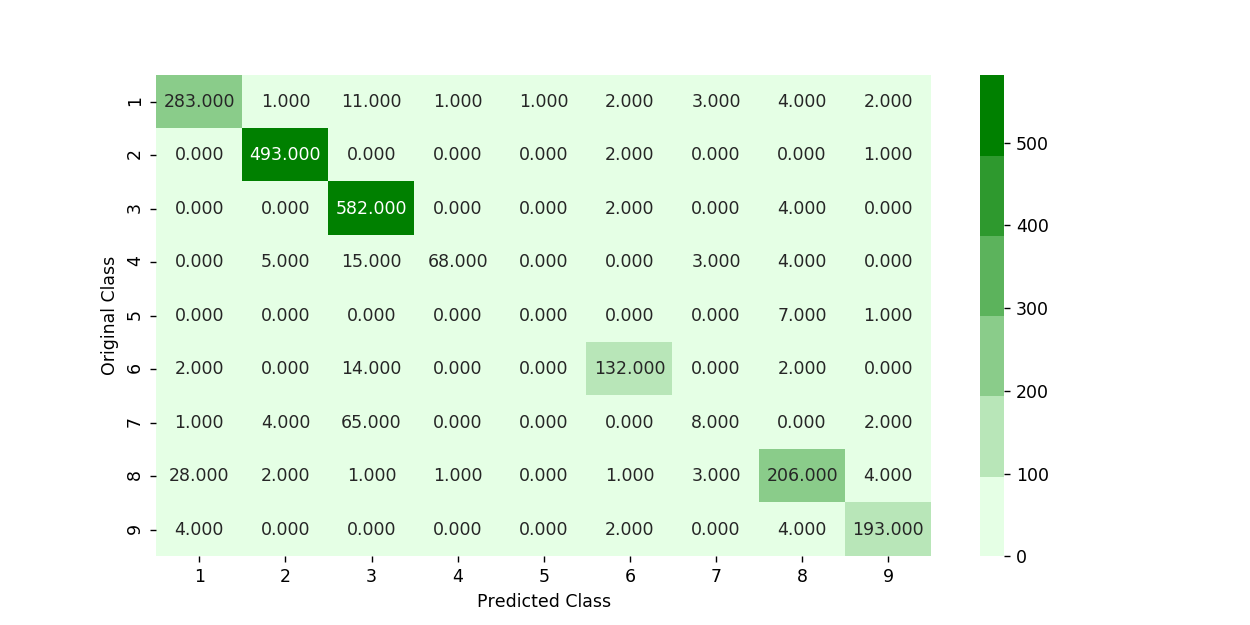

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


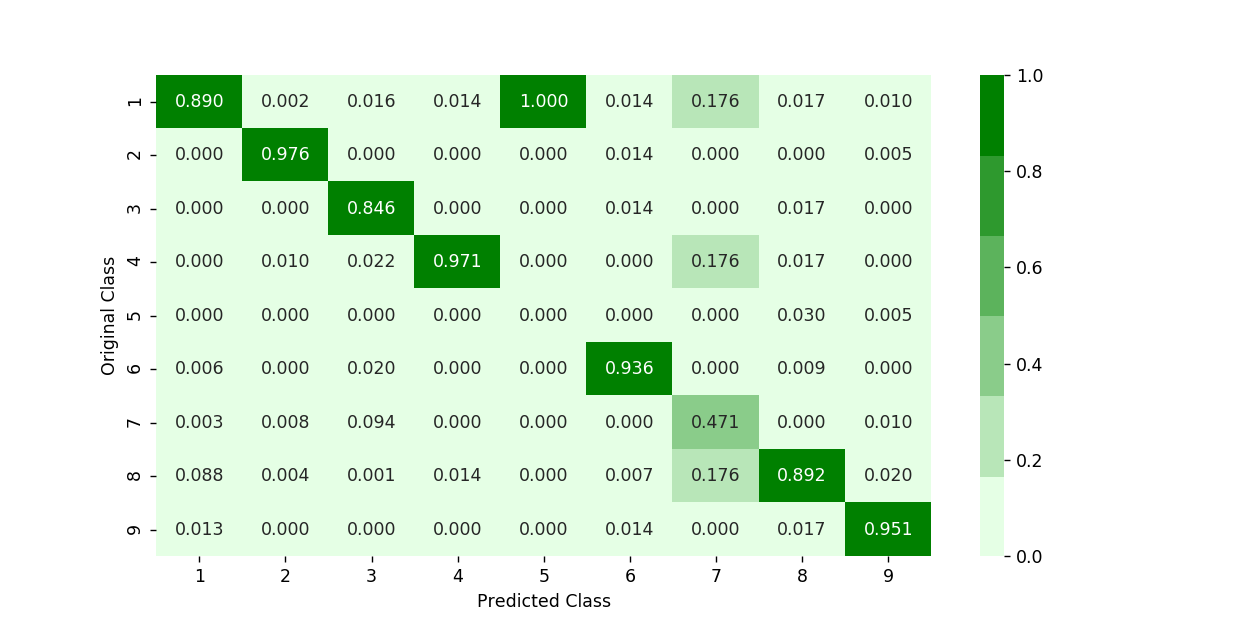

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


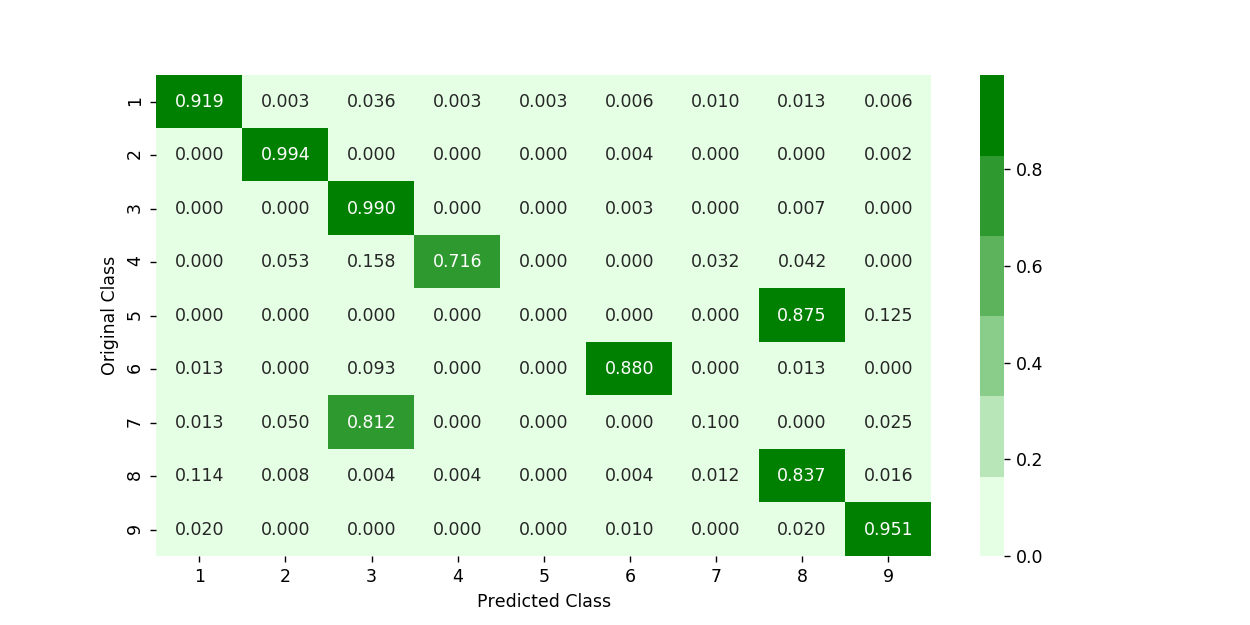

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.3 Random Forest Classifier</h3>

log_loss for c =  10 is 0.0581657906023
log_loss for c =  50 is 0.0515443148419
log_loss for c =  100 is 0.0513084973231
log_loss for c =  500 is 0.0499021761479
log_loss for c =  1000 is 0.0497972474298
log_loss for c =  2000 is 0.0497091690815
log_loss for c =  3000 is 0.0496706817633


<IPython.core.display.Javascript object>


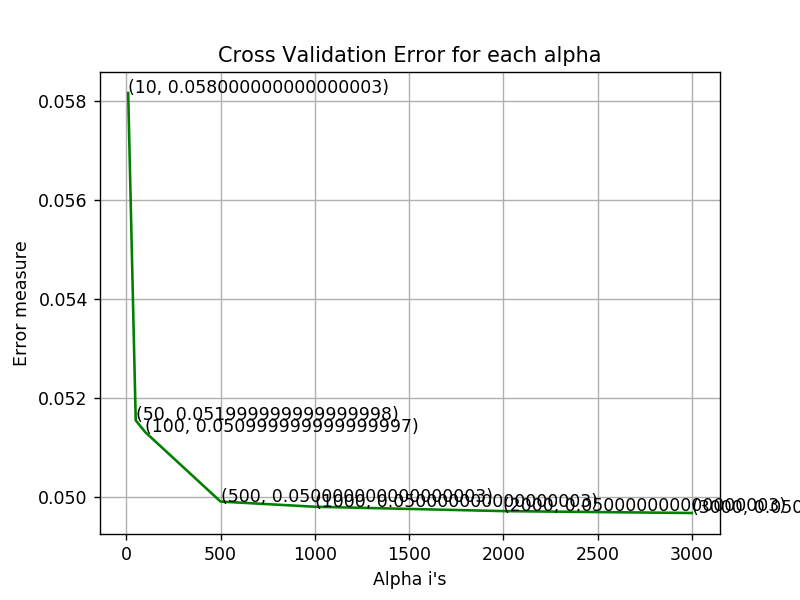

log loss for train data 0.0116517052676
log loss for cv data 0.0496706817633
log loss for test data 0.0571239496453
Number of misclassified points  1.14995400184
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


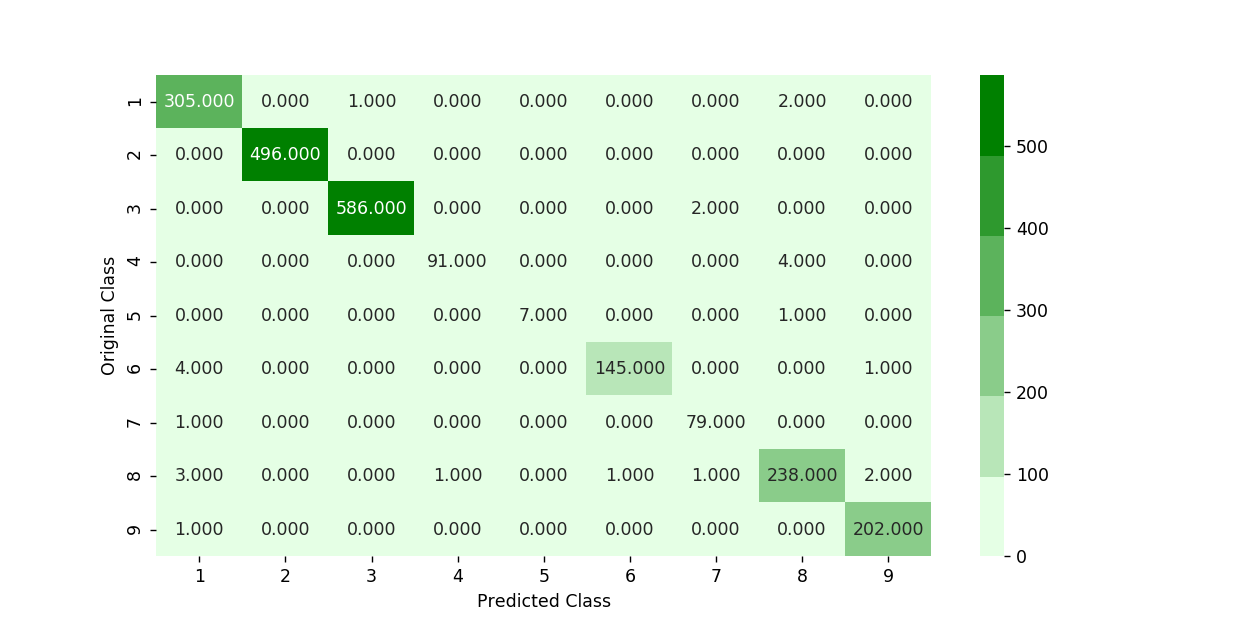

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


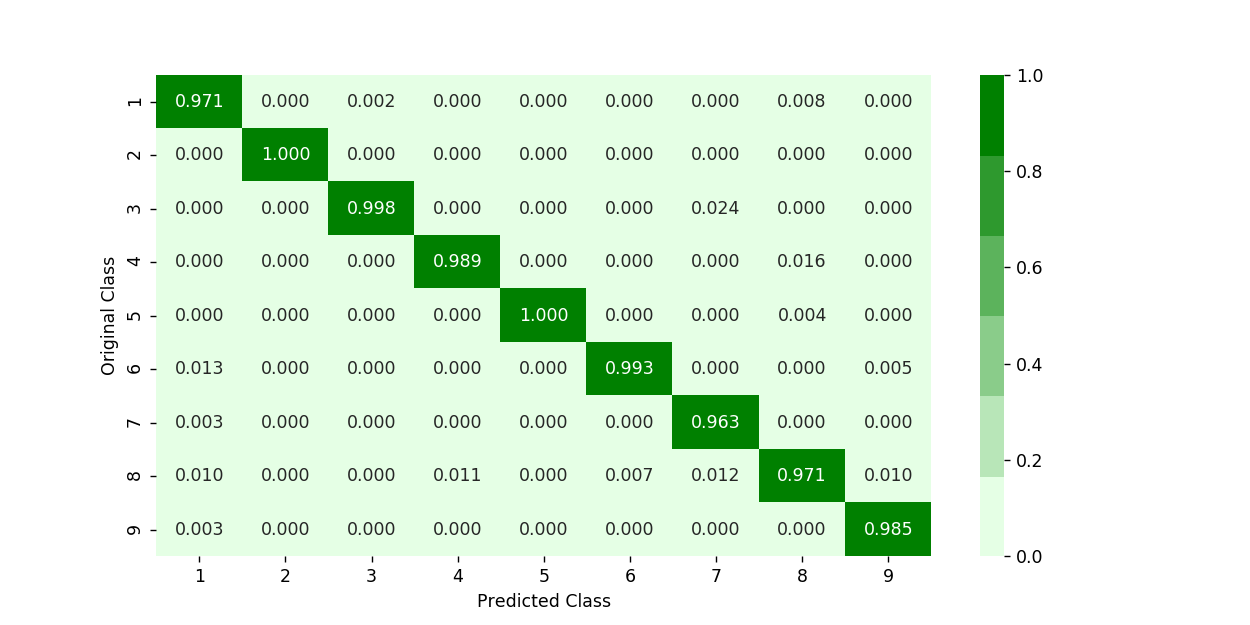

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


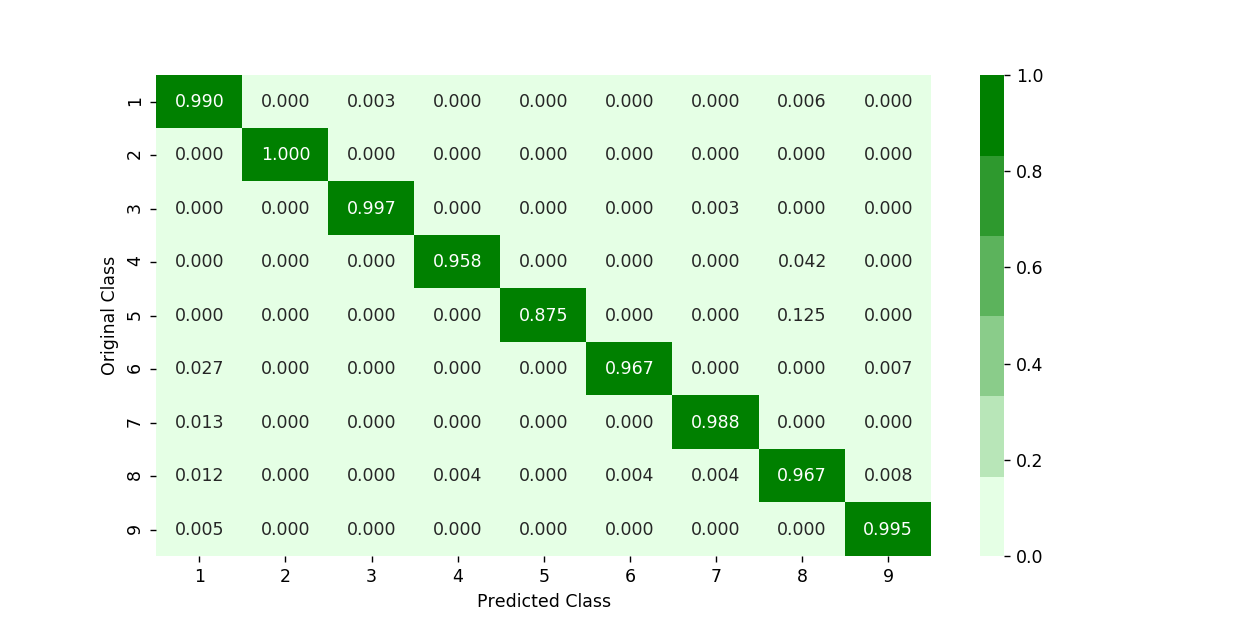

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.4 XgBoost Classifier</h3>

log_loss for c =  10 is 0.104344888454
log_loss for c =  50 is 0.0567190635611
log_loss for c =  100 is 0.056075038646
log_loss for c =  500 is 0.057336051683
log_loss for c =  1000 is 0.0571265109903
log_loss for c =  2000 is 0.057103406781
log_loss for c =  3000 is 0.0567993215778


<IPython.core.display.Javascript object>


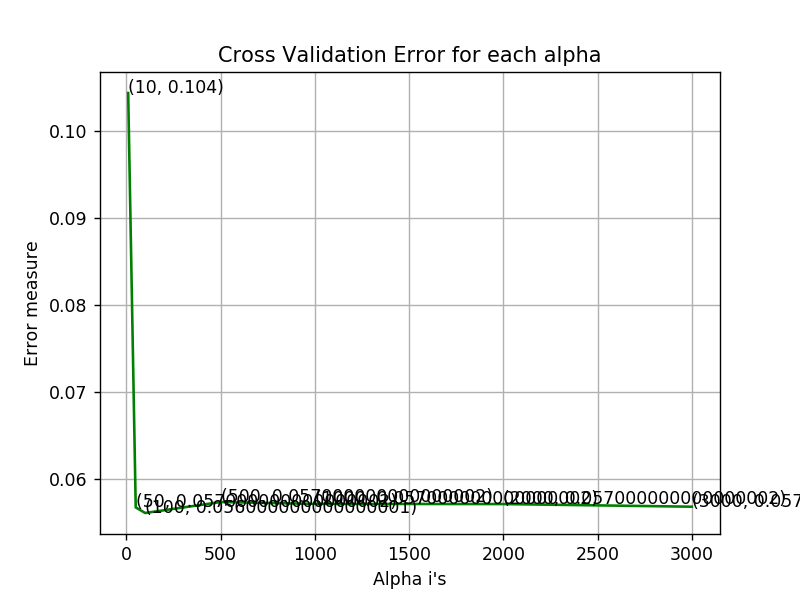

For values of best alpha =  100 The train log loss is: 0.0117883742574
For values of best alpha =  100 The cross validation log loss is: 0.056075038646
For values of best alpha =  100 The test log loss is: 0.0491647763845
Number of misclassified points  0.873965041398
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


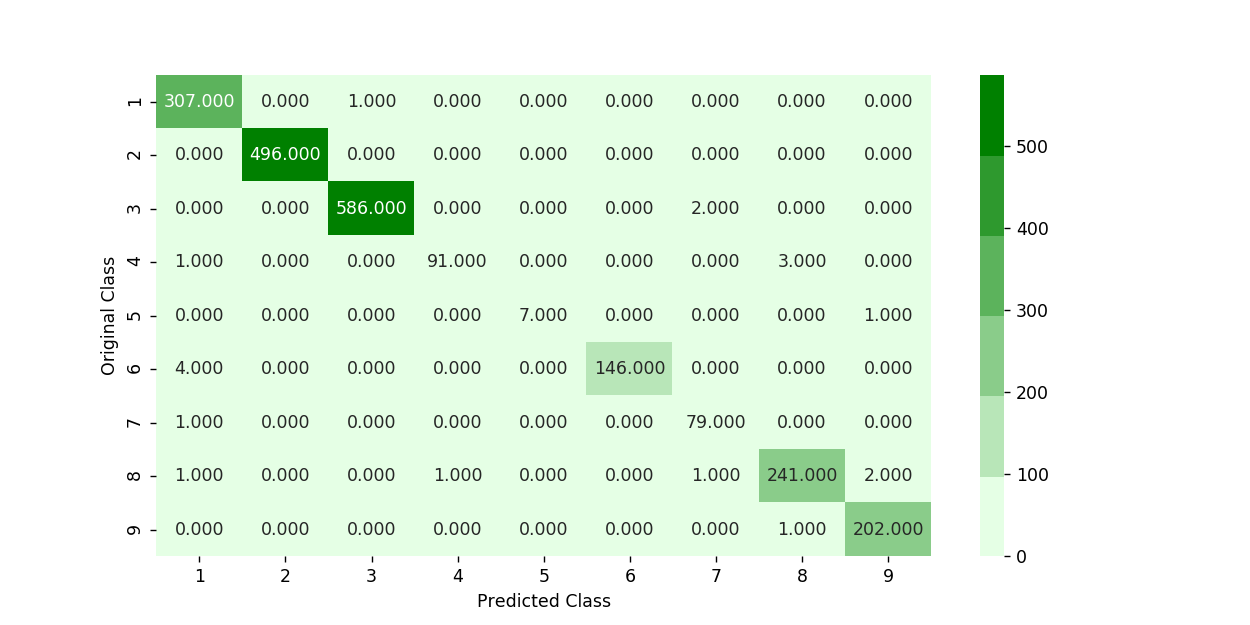

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


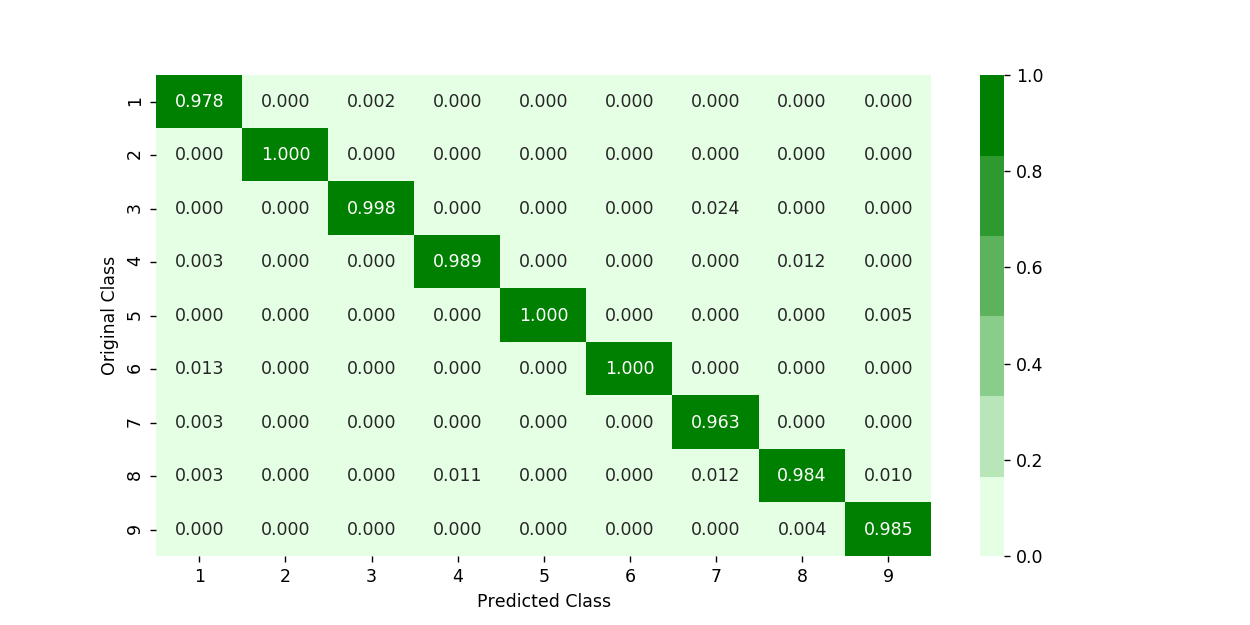

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


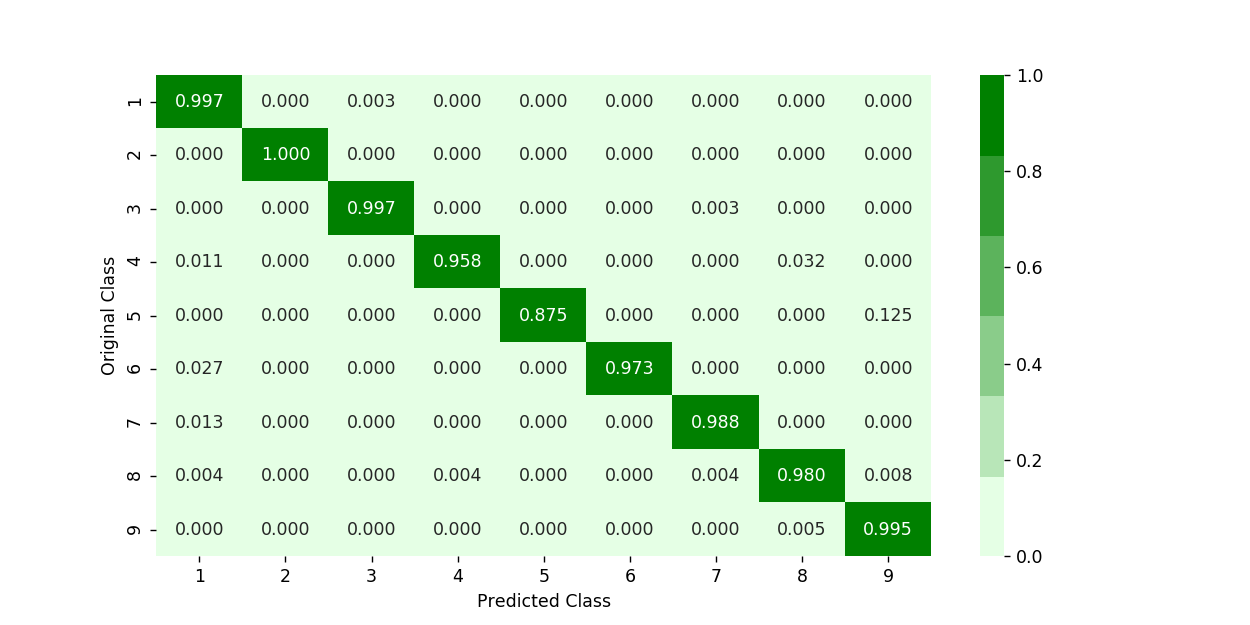

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.5 Xgboost Classifier with best hyperparameters</h3>

In [0]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  1.1min remaining:   39.3s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.3min remaining:   23.0s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.4min remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.3min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=10)

In [0]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.5}


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here 
# http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=200,subsample=0.5,learning_rate=0.15,colsample_bytree=0.5,max_depth=3)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

train loss 0.0102661325822
cv loss 0.0501201796687
test loss 0.0483908764397


<h2> 4.5. Machine Learning models on features of both .asm and .bytes files</h2>

<h3> 4.5.1. Merging both asm and byte file features</h3>

In [18]:
result.head()

,b4 f2,4f 1c,55 ff,f6 d2,3f 7c,91 dd,35 85,00 25,82 a4,9b 7f,...,fa,fb,fc,fd,fe,ff,??,size,ID,Class
0,0.002632,0.000039,0.000000,0.000429,0.000613,0.000000,0.000144,0.000077,0.000000,0.000000,...,0.001470,0.001646,0.005671,0.001793,0.001914,0.000683,0.006111,0.010226,gC2GsRX3ewpQyvjO0Hb4,4
1,0.042105,0.000311,0.003446,0.003861,0.005513,0.021898,0.000791,0.000689,0.024465,0.057851,...,0.013299,0.013801,0.037763,0.015582,0.016620,0.009687,0.105191,0.150254,61SnhUm4jdWiFCZGsPJ7,3
2,0.047368,0.000584,0.002328,0.003432,0.003675,0.012774,0.000648,0.000434,0.018349,0.061983,...,0.013018,0.014202,0.037751,0.014746,0.016438,0.009169,0.105697,0.150520,6E78GVaCMig3mTz1oFb0,3
3,0.000000,0.000000,0.000186,0.011798,0.000000,0.000000,0.000000,0.000026,0.000000,0.000000,...,0.000343,0.023935,0.001967,0.000629,0.006376,0.002177,0.000282,0.034185,4mvuMIJG9n3iQgPSaZh7,2
4,0.039474,0.000817,0.002049,0.001716,0.003063,0.025547,0.000576,0.000613,0.018349,0.066116,...,0.012622,0.013854,0.037912,0.015094,0.016615,0.009152,0.105300,0.150254,fNAE3eU6Q4Gh5PtnCyMZ,3


In [19]:
result_asm.head()

,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,esi,eax,ebx,ecx,edi,ebp,esp,eip,Class,size
0,01kcPWA9K2BOxQeS5Rju,0.107345,0.001092,0.0,0.000761,0.000023,0.0,0.000084,0.0,0.000072,...,0.000746,0.000301,0.000360,0.001057,0.0,0.030797,0.001468,0.003173,1,0.000432
1,1E93CpP60RHFNiT5Qfvn,0.096045,0.001230,0.0,0.000617,0.000019,0.0,0.000000,0.0,0.000072,...,0.000328,0.000965,0.000686,0.000153,0.0,0.025362,0.000000,0.002188,1,0.000327
2,3ekVow2ajZHbTnBcsDfX,0.096045,0.000627,0.0,0.000300,0.000017,0.0,0.000038,0.0,0.000072,...,0.000475,0.000201,0.000560,0.000178,0.0,0.019928,0.000000,0.000985,1,0.000172
3,3X2nY7iQaPBIWDrAZqJe,0.096045,0.000333,0.0,0.000258,0.000008,0.0,0.000000,0.0,0.000072,...,0.000090,0.000281,0.000059,0.000025,0.0,0.014493,0.000000,0.000657,1,0.000009
4,46OZzdsSKDCFV8h7XWxf,0.096045,0.000590,0.0,0.000353,0.000068,0.0,0.000000,0.0,0.000072,...,0.000102,0.000362,0.000243,0.000064,0.0,0.019928,0.000000,0.001204,1,0.000143


In [20]:
print(result.shape)
print(result_asm.shape)

(10868, 66443)
(10868, 54)


In [21]:
result_x = pd.merge(result,result_asm.drop(['Class'], axis=1),on='ID', how='left')
result_y = result_x['Class']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class'], axis=1)
result_x.head()

,b4 f2,4f 1c,55 ff,f6 d2,3f 7c,91 dd,35 85,00 25,82 a4,9b 7f,...,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip,size_y
0,0.002632,0.000039,0.000000,0.000429,0.000613,0.000000,0.000144,0.000077,0.000000,0.000000,...,0.010189,0.005073,0.008823,0.001154,0.003019,0.0,0.000000,0.0,0.000000,0.027879
1,0.042105,0.000311,0.003446,0.003861,0.005513,0.021898,0.000791,0.000689,0.024465,0.057851,...,0.001546,0.001051,0.004622,0.001246,0.003465,0.0,0.021739,0.0,0.004267,0.001104
2,0.047368,0.000584,0.002328,0.003432,0.003675,0.012774,0.000648,0.000434,0.018349,0.061983,...,0.000821,0.000870,0.002532,0.000402,0.000968,0.0,0.021739,0.0,0.004267,0.000725
3,0.000000,0.000000,0.000186,0.011798,0.000000,0.000000,0.000000,0.000026,0.000000,0.000000,...,0.025493,0.075681,0.036737,0.010832,0.024446,0.0,0.016304,0.0,0.011380,0.154273
4,0.039474,0.000817,0.002049,0.001716,0.003063,0.025547,0.000576,0.000613,0.018349,0.066116,...,0.001107,0.001412,0.003035,0.001288,0.002319,0.0,0.021739,0.0,0.004267,0.000876


<h3> 4.5.2. Multivariate Analysis on final fearures</h3>

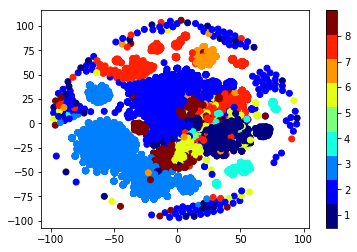

In [30]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_x)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

<h3> 4.5.3. Train and Test split</h3>

In [32]:
result_x.to_pickle(os.path.join(dir_path, "train_x.pkl"))
result_y.to_pickle(os.path.join(dir_path, "train_y.pkl"))

In [18]:
################################################################
################################################################
################################################################
result_x = pd.read_pickle(os.path.join(dir_path, "train_x.pkl"))
result_y = pd.read_pickle(os.path.join(dir_path, "train_y.pkl"))

In [5]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3> 4.5.4. Random Forest Classifier on final features</h3>

log_loss for c =  10 is 0.08266001297537119
log_loss for c =  50 is 0.06861074528170644
log_loss for c =  100 is 0.06622511795563381
log_loss for c =  500 is 0.067147167823115
log_loss for c =  1000 is 0.06754487123937257
log_loss for c =  2000 is 0.06710910929482129
log_loss for c =  3000 is 0.06728384981444502


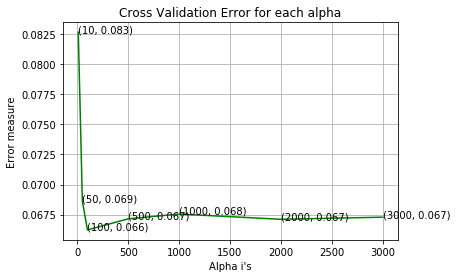

For values of best alpha =  100 The train log loss is: 0.01870607955214048
For values of best alpha =  100 The cross validation log loss is: 0.06622511795563381
For values of best alpha =  100 The test log loss is: 0.06755930490648145


In [33]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link:https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-2)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-2)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

In [6]:
X_train_merge.shape

(6955, 66356)

<h3> 4.5.5. XgBoost Classifier on final features with best hyper parameters using Random search</h3>

In [ ]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
# had to keep n_jobs=2, more than that will lead to in-sufficient memory (52GB)
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=0,n_jobs=3,cv=2)
random_cfl.fit(X_train_merge, y_train_merge)

In [7]:
print(random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 0.5}


In [ ]:

# find more about XGBClassifier function here 
# http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=1000,max_depth=10,learning_rate=0.03,colsample_bytree=0.5,subsample=1,nthread=3)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)

In [16]:
import pickle
with open(os.path.join(dir_path, "model.pkl"), 'wb') as z:
    pickle.dump(sig_clf, z)

In [6]:
import pickle
with open(os.path.join(dir_path, "model.pkl"), 'rb') as fi:
    sig_clf = pickle.load(fi)

For values of best alpha =  1000 The train log loss is: 0.019158758209770022
For values of best alpha =  1000 The cross validation log loss is: 0.015259414515562772
For values of best alpha =  1000 The test log loss is: 0.020868097065813034
Number of misclassified points  0.18399264029438822
-------------------------------------------------- Confusion matrix --------------------------------------------------


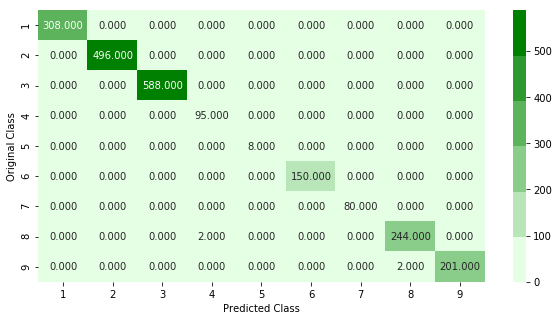

-------------------------------------------------- Precision matrix --------------------------------------------------


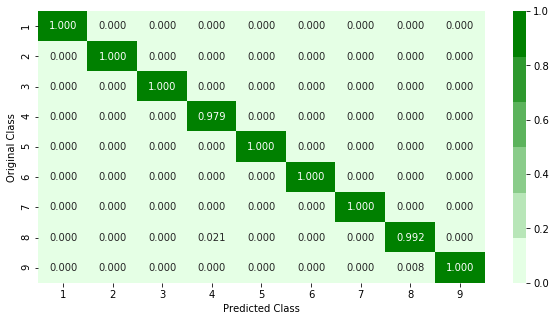

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


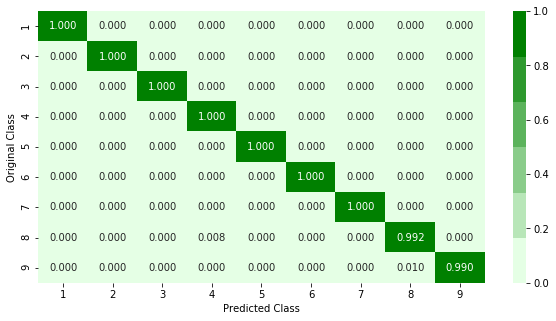

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [9]:
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', 1000, "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', 1000, "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', 1000, "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge, sig_clf.predict(X_test_merge))

## 4.6 ASM image feature extraction

In [3]:
from multiprocessing import Pool
import os
from csv import writer
import numpy as np
import math
import scipy.misc
import array
import time as tm

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, KFold

In [4]:
# From Say_No_to_Overfitting
def entropy(p,n):
    p_ratio = float(p)/(p+n)
    n_ratio = float(n)/(p+n)
    return -p_ratio*math.log(p_ratio) - n_ratio * math.log(n_ratio)

def info_gain(p0,n0,p1,n1,p,n):
    return entropy(p,n) - float(p0+n0)/(p+n)*entropy(p0,n0) - float(p1+n1)/(p+n)*entropy(p1,n1)

In [25]:
def read_image(filename):
    f = open(filename,'rb')
    ln = os.path.getsize(filename) # length of file in bytes
    width = 256
    rem = ln%width
    a = array.array("B") # uint8 array
    a.fromfile(f,ln-rem)
    f.close()
#     print(type(a), int(len(a)/width))
    g = np.reshape(a,(int(len(a)/width), width))
#     print("#####")
    g = np.uint8(g)
    g = np.resize(g, (1000,))
    return list(g)

In [28]:
# Do asm image extraction
def extract_asm_image_features(tfiles):
    asm_files = [i for i in tfiles if '.asm' in i]
    ftot = len(asm_files)
    
    pid = os.getpid()
#     print('Process id:', pid)
    feature_file = os.path.join(dir_path, str(pid) + '-image-features-asm.csv')
#     print('feature file:', feature_file)
    
    outrows = []
    with open(feature_file,'w') as f:
        fw = writer(f)
        column_names = ['filename'] + [("ASM_{:s}".format(str(x))) for x in range(1000)]
        fw.writerow(column_names)
        for idx, fname in enumerate(asm_files):
            file_id = fname.split('.')[0]
#             print("reading image", os.path.join(ext_drive, fname))
            image_data = read_image(os.path.join(ext_drive, fname))
            outrows.append([file_id] + image_data)
            
            # Print progress
            if (idx+1) % 100 == 0:
                print(pid, idx + 1, 'of', ftot, 'files processed.')
                fw.writerows(outrows)
                outrows = []
                                       
        # Write remaining files
        if len(outrows) > 0:
            fw.writerows(outrows)
            outrows = []

### 4.6.1 Featurization of ASM files

In [29]:
# Now divide the train files into five groups for multiprocessing
start_time = tm.time()
ext_drive = os.path.join(dir_path, 'asmFiles')
tfiles = os.listdir(ext_drive)
quart = int(len(tfiles)/4)
# print(quart)
train1 = tfiles[:quart]
train2 = tfiles[quart:(2*quart)]
train3 = tfiles[(2*quart):(3*quart)]
train4 = tfiles[(3*quart):]
# train5 = tfiles[(4*quart):]
print(len(tfiles), quart, (len(train1)+len(train2)+len(train3)+len(train4)))
trains = [train1, train2, train3, train4]
p = Pool(4)
p.map(extract_asm_image_features, trains)
print("Elapsed time: {:.2f} hours.".format((tm.time() - start_time)/3600.0))

10868 2717 10868
2866 100 of 2717 files processed.
2867 100 of 2717 files processed.
2864 100 of 2717 files processed.
2865 100 of 2717 files processed.
2866 200 of 2717 files processed.
2867 200 of 2717 files processed.
2864 200 of 2717 files processed.
2865 200 of 2717 files processed.
2866 300 of 2717 files processed.
2867 300 of 2717 files processed.
2864 300 of 2717 files processed.
2865 300 of 2717 files processed.
2866 400 of 2717 files processed.
2867 400 of 2717 files processed.
2864 400 of 2717 files processed.
2866 500 of 2717 files processed.
2865 400 of 2717 files processed.
2867 500 of 2717 files processed.
2866 600 of 2717 files processed.
2864 500 of 2717 files processed.
2867 600 of 2717 files processed.
2865 500 of 2717 files processed.
2866 700 of 2717 files processed.
2864 600 of 2717 files processed.
2867 700 of 2717 files processed.
2865 600 of 2717 files processed.
2866 800 of 2717 files processed.
2864 700 of 2717 files processed.
2867 800 of 2717 files processe

In [6]:
#merging all csv files

# train_data = pd.read_csv('data/train-malware-features-asm.csv')
labels = pd.read_csv(os.path.join(dir_path, 'trainLabels.csv'))
d1 = pd.read_csv(os.path.join(dir_path, '2864-image-features-asm.csv'))
d2 = pd.read_csv(os.path.join(dir_path, '2865-image-features-asm.csv'))
d3 = pd.read_csv(os.path.join(dir_path, '2866-image-features-asm.csv'))
d4 = pd.read_csv(os.path.join(dir_path, '2867-image-features-asm.csv'))
d4.shape

(2717, 1001)

In [7]:
data = pd.concat([d1, d2, d3, d4])
data.shape

(10868, 1001)

In [8]:
data.reset_index(drop=True, inplace=True)

In [9]:
labels.head()

,Id,Class
0,01kcPWA9K2BOxQeS5Rju,1
1,04EjIdbPV5e1XroFOpiN,1
2,05EeG39MTRrI6VY21DPd,1
3,05rJTUWYAKNegBk2wE8X,1
4,0AnoOZDNbPXIr2MRBSCJ,1


In [12]:
sorted_train_data = data.sort_values(by='filename', axis=0, ascending=True, inplace=False)
sorted_train_labels = labels.sort_values(by='Id', axis=0, ascending=True, inplace=False)
X = sorted_train_data.iloc[:,1:]
y = np.array(sorted_train_labels.iloc[:,1])

In [13]:
X.shape, y.shape

((10868, 1000), (10868,))

### 4.6.2 Selecting top 50% variance features

In [14]:
# find the top 50 percent variance features, from 1000 -> 500 features
fsp = SelectPercentile(chi2, 50)
X_new_50 = fsp.fit_transform(X,y)
X_new_50.shape

(10868, 500)

In [15]:
selected_names = fsp.get_support(indices=True)
selected_names = selected_names + 1
selected_names

array([  2,   4,   5,  15,  21,  22,  24,  25,  26,  27,  29,  30,  32,
        33,  34,  35,  41,  42,  43,  44,  48,  50, 125, 126, 135, 136,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 151, 152,
       154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 167, 169,
       173, 174, 179, 186, 188, 190, 198, 201, 202, 205, 215, 216, 217,
       219, 220, 221, 222, 223, 224, 226, 227, 229, 236, 240, 241, 242,
       243, 244, 245, 246, 247, 248, 249, 252, 253, 260, 261, 262, 263,
       264, 265, 266, 267, 268, 269, 271, 272, 273, 282, 287, 291, 292,
       293, 294, 295, 296, 297, 307, 308, 310, 311, 312, 313, 314, 315,
       316, 317, 318, 319, 321, 323, 326, 327, 328, 330, 334, 337, 338,
       339, 340, 341, 343, 344, 345, 346, 349, 350, 351, 352, 353, 354,
       356, 357, 358, 359, 366, 367, 368, 370, 371, 372, 373, 374, 375,
       376, 378, 379, 380, 381, 384, 385, 386, 387, 388, 390, 391, 392,
       399, 400, 401, 402, 403, 404, 405, 408, 409, 410, 412, 41

In [16]:
data_trimmed = sorted_train_data.iloc[:,selected_names]
data_fnames = pd.DataFrame(sorted_train_data['filename'])
data_reduced = data_fnames.join(data_trimmed)
data_reduced.head()

,filename,ASM_1,ASM_3,ASM_4,ASM_14,ASM_20,ASM_21,ASM_23,ASM_24,ASM_25,...,ASM_984,ASM_988,ASM_989,ASM_990,ASM_991,ASM_994,ASM_995,ASM_996,ASM_997,ASM_998
573,01IsoiSMh5gxyDYTl4CB,116,120,116,9,32,32,32,32,32,...,54,41,13,10,46,120,116,58,48,48
1508,01SuzwMJEIXsK7A8dQbl,69,68,69,48,9,9,13,10,72,...,32,10,46,116,101,58,48,48,52,48
4943,01azqd4InC7m9JpocGv5,69,68,69,48,9,9,13,10,72,...,32,10,46,116,101,58,48,48,52,48
9992,01jsnpXSAlgw6aPeDxrU,69,68,69,48,9,9,13,10,72,...,32,10,46,116,101,58,48,48,52,48
7307,01kcPWA9K2BOxQeS5Rju,69,68,69,48,9,9,13,10,72,...,83,83,69,71,77,84,32,72,69,65


In [17]:
data_reduced.to_csv(os.path.join(dir_path, 'sorted-features-asm-50percent.csv'), index=False)

In [9]:
data_reduced = pd.read_csv(os.path.join(dir_path, 'sorted-features-asm-50percent.csv'))
data_reduced.shape

(10868, 501)

### 4.6.3 Merging with bytes bi-gram features

In [10]:
###############################################
###############################################
with h5py.File(os.path.join(dir_path, 'final_byte_features.h5'), 'r') as hf:
    feat_arr = hf["feature_array"][:]
with open(os.path.join(dir_path, 'id_values.pkl'), 'rb') as f2:
    class_id = list(pickle.load(f2))
with open(os.path.join(dir_path, 'class_values.pkl'), 'rb') as f3:
    data_y = list(pickle.load(f3))

In [11]:
feat_arr.shape

(10868, 66441)

In [12]:
result = pd.DataFrame(feat_arr, columns=cols_to_norm)
result['ID'] = class_id
result['Class'] = data_y
result.head()

,b4 f2,4f 1c,55 ff,f6 d2,3f 7c,91 dd,35 85,00 25,82 a4,9b 7f,...,fa,fb,fc,fd,fe,ff,??,size,ID,Class
0,0.002632,0.000039,0.000000,0.000429,0.000613,0.000000,0.000144,0.000077,0.000000,0.000000,...,0.001470,0.001646,0.005671,0.001793,0.001914,0.000683,0.006111,0.010226,gC2GsRX3ewpQyvjO0Hb4,4
1,0.042105,0.000311,0.003446,0.003861,0.005513,0.021898,0.000791,0.000689,0.024465,0.057851,...,0.013299,0.013801,0.037763,0.015582,0.016620,0.009687,0.105191,0.150254,61SnhUm4jdWiFCZGsPJ7,3
2,0.047368,0.000584,0.002328,0.003432,0.003675,0.012774,0.000648,0.000434,0.018349,0.061983,...,0.013018,0.014202,0.037751,0.014746,0.016438,0.009169,0.105697,0.150520,6E78GVaCMig3mTz1oFb0,3
3,0.000000,0.000000,0.000186,0.011798,0.000000,0.000000,0.000000,0.000026,0.000000,0.000000,...,0.000343,0.023935,0.001967,0.000629,0.006376,0.002177,0.000282,0.034185,4mvuMIJG9n3iQgPSaZh7,2
4,0.039474,0.000817,0.002049,0.001716,0.003063,0.025547,0.000576,0.000613,0.018349,0.066116,...,0.012622,0.013854,0.037912,0.015094,0.016615,0.009152,0.105300,0.150254,fNAE3eU6Q4Gh5PtnCyMZ,3


In [13]:
data_reduced.rename(columns={'filename': 'ID'}, inplace=True)

In [14]:
result_x_with_id = pd.merge(data_reduced, result.drop(['size'], axis=1),on='ID', how='left')
result_y = result_x_with_id['Class']
result_x = result_x_with_id.drop(['ID', 'Class'], axis=1)
result_x.head()

,ASM_1,ASM_3,ASM_4,ASM_14,ASM_20,ASM_21,ASM_23,ASM_24,ASM_25,ASM_26,...,f7,f8,f9,fa,fb,fc,fd,fe,ff,??
0,116,120,116,9,32,32,32,32,32,32,...,0.002018,0.035399,0.001920,0.001147,0.001329,0.087867,0.002432,0.088411,0.074851,0.000606
1,69,68,69,48,9,9,13,10,72,69,...,0.003790,0.005129,0.001530,0.000853,0.001052,0.007511,0.001038,0.001258,0.002998,0.000636
2,69,68,69,48,9,9,13,10,72,69,...,0.012546,0.019969,0.013560,0.013107,0.013634,0.031724,0.014549,0.014348,0.007843,0.000129
3,69,68,69,48,9,9,13,10,72,69,...,0.010402,0.012771,0.009804,0.011777,0.012604,0.028423,0.013080,0.013937,0.067001,0.000033
4,69,68,69,48,9,9,13,10,72,69,...,0.002139,0.004728,0.002121,0.001886,0.002272,0.013032,0.002211,0.003957,0.010904,0.000984


In [15]:
result_x_with_id.to_csv(os.path.join(dir_path, "bytes_asm_img_feats.csv"), index=False)

In [16]:
result_x_with_id.shape

(10868, 66942)

In [17]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [20]:
with h5py.File(os.path.join(dir_path, 'final_X_train_merge.h5'), 'w') as hf:
    hf.create_dataset("X_train_merge",  data=X_train_merge)
    
with h5py.File(os.path.join(dir_path, 'final_X_cv_merge.h5'), 'w') as hf:
    hf.create_dataset("X_cv_merge",  data=X_cv_merge)

with h5py.File(os.path.join(dir_path, 'final_X_test_merge.h5'), 'w') as hf:
    hf.create_dataset("X_test_merge",  data=X_test_merge)
    
with h5py.File(os.path.join(dir_path, 'final_y_train_merge.h5'), 'w') as hf:
    hf.create_dataset("y_train_merge",  data=y_train_merge)

with h5py.File(os.path.join(dir_path, 'final_y_cv_merge.h5'), 'w') as hf:
    hf.create_dataset("y_cv_merge",  data=y_cv_merge)
    
with h5py.File(os.path.join(dir_path, 'final_y_test_merge.h5'), 'w') as hf:
    hf.create_dataset("y_test_merge",  data=y_test_merge)

In [3]:
####################################################################################
####################################################################################
####################################################################################
with h5py.File(os.path.join(dir_path, 'final_X_train_merge.h5'), 'r') as hf:
    X_train_merge = hf["X_train_merge"][:]

with h5py.File(os.path.join(dir_path, 'final_X_cv_merge.h5'), 'r') as hf:
    X_cv_merge = hf["X_cv_merge"][:]
    
with h5py.File(os.path.join(dir_path, 'final_X_test_merge.h5'), 'r') as hf:
    X_test_merge = hf["X_test_merge"][:]
    
with h5py.File(os.path.join(dir_path, 'final_y_train_merge.h5'), 'r') as hf:
    y_train_merge = hf["y_train_merge"][:]
    
with h5py.File(os.path.join(dir_path, 'final_y_cv_merge.h5'), 'r') as hf:
    y_cv_merge = hf["y_cv_merge"][:]
    
with h5py.File(os.path.join(dir_path, 'final_y_test_merge.h5'), 'r') as hf:
    y_test_merge = hf["y_test_merge"][:]

### 4.6.4 XGBoost on both Bytes bi-gram and ASM image features

In [5]:
x_cfl=XGBClassifier()

params={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
    'n_estimators':[100,200,500,1000,2000],
    'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
# had to keep n_jobs=4, more than that will lead to in-sufficient memory (52GB)
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=params,verbose=2,n_jobs=4,cv=2)
random_cfl.fit(X_train_merge, y_train_merge)
print(random_cfl.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
x_cfl=XGBClassifier(n_estimators=1000,max_depth=10,learning_rate=0.03,colsample_bytree=0.5,subsample=1,nthread=3)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)

In [ ]:
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', 1000, "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', 1000, "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', 1000, "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge, sig_clf.predict(X_test_merge))

# [5] Conclusion

In [1]:
from prettytable import PrettyTable

In [2]:
x = PrettyTable()
x.field_names = ["Algorithm", "Feature Engg", "Hyperparameter", "Train log-loss", "Test log-loss"]

In [3]:
x.add_row(["Logistic Regression", "Bytes bi-grams", "c=1000", 0.047, 0.18])
x.add_row(["Random Forest", "Bytes bi-grams", "n_estimators=1000", 0.0198, 0.077])
x.add_row(["XGBoost", "Bytes bi-grams", "n_estimators=100", 0.0145, 0.0489])
x.add_row(["KNN", "ASM uni-grams", "n_neighbors=3", 0.0476, 0.0894])
x.add_row(["Logistic Regression", "ASM uni-grams", "C=1000", 0.396, 0.4156])
x.add_row(["Random Forest", "ASM uni-grams", "n_estimators=3000", 0.0116, 0.0571])
x.add_row(["XgBoost", "ASM uni-grams", "n_estimators=200, max_depth=5", 0.0102, 0.048])
x.add_row(["Random Forest", "Bytes bi-grams, ASM uni-grams", "n_estimators=100", 0.0187, 0.0675])
x.add_row(["XgBoost", "Bytes bi-grams, ASM uni-grams", "n_estimators=1000, max_depth=10", 0.0191, 0.0208])
x.add_row(["XgBoost", "Bytes bi-grams, ASM image features", "-", 0, 0])
print(x)

+---------------------+------------------------------------+---------------------------------+----------------+---------------+
|      Algorithm      |            Feature Engg            |          Hyperparameter         | Train log-loss | Test log-loss |
+---------------------+------------------------------------+---------------------------------+----------------+---------------+
| Logistic Regression |           Bytes bi-grams           |              c=1000             |     0.047      |      0.18     |
|    Random Forest    |           Bytes bi-grams           |        n_estimators=1000        |     0.0198     |     0.077     |
|       XGBoost       |           Bytes bi-grams           |         n_estimators=100        |     0.0145     |     0.0489    |
|         KNN         |           ASM uni-grams            |          n_neighbors=3          |     0.0476     |     0.0894    |
| Logistic Regression |           ASM uni-grams            |              C=1000             |     0.396

# Procedure 

1. Performed Exploratory data analysis on Bytes files.
2. Extracted bigrams from bytes files.
3. Performed Multi variate analysis on the Bytes features using TSNE.
4. Applied ML models on bytes features -> Logistic regression, Random Forest, XGBoost.
5. Extracted features from ASM files and normalized.
6. Performed Multi variate analysis on the ASM features using TSNE.
7. Applied ML models on ASM features -> K-Nearest Neigbors, Logistic regression, Random Forest, XGBoost.
8. Merged both ASM and Bytes features and applied ML models -> Random Forest, XgBoost.
9. Extracted ASM image features using https://github.com/dchad/malware-detection
10. Merged ASM image features and Bytes bi-grams and applied Tuned XGBoost to further reduce log-loss.